In [1]:
import pandas as pd
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import onekey_algo.custom.components as okcomp
from onekey_algo import get_param_in_cwd

plt.rcParams['figure.dpi'] = 300
model_names = get_param_in_cwd('summary_models') + ['Combined']
# 获取配置
task = get_param_in_cwd('task_column')
sel_m = get_param_in_cwd('sel_model')
labelf = get_param_in_cwd('label_file')
group_info = get_param_in_cwd('dataset_column') or 'group'

# 读取label文件。
labels = [task]
label_data_ = pd.read_csv(labelf)
label_data_['ID'] = label_data_['ID'].map(lambda x: f"{x}.nii.gz" if not (f"{x}".endswith('.nii.gz') or  f"{x}".endswith('.nii')) else x)
label_data_ = label_data_[['ID', group_info, task]]
label_data_ = label_data_.dropna(axis=0)

ids = label_data_['ID']
print(label_data_.columns)
label_data = label_data_
label_data

Index(['ID', 'group', 'label'], dtype='object')


ID  group  label
0       1.nii.gz  train      0
1     100.nii.gz    val      1
2    1001.nii.gz  train      0
3    1003.nii.gz  train      1
4     101.nii.gz    val      0
..           ...    ...    ...
755   978.nii.gz  train      0
756   980.nii.gz  train      1
757   981.nii.gz  train      1
758   984.nii.gz  train      1
759    99.nii.gz  train      1

[760 rows x 3 columns]

# 训练集-Nomogram

[2025-12-09 20:14:22 - situation.py:  45]	INFO	cffi mode is CFFI_MODE.ANY
[2025-12-09 20:14:22 - situation.py: 189]	INFO	R home found: C:\onekey\onekey_envs\Lib\R
[2025-12-09 20:14:23 - situation.py: 136]	ERROR	Unable to determine R library path: Command '('C:\\onekey\\onekey_envs\\Lib\\R\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.
[2025-12-09 20:14:23 - situation.py: 147]	INFO	LD_LIBRARY_PATH: 
[2025-12-09 20:14:23 - embedded.py:  20]	INFO	Default options to initialize R: rpy2, --quiet, --no-save


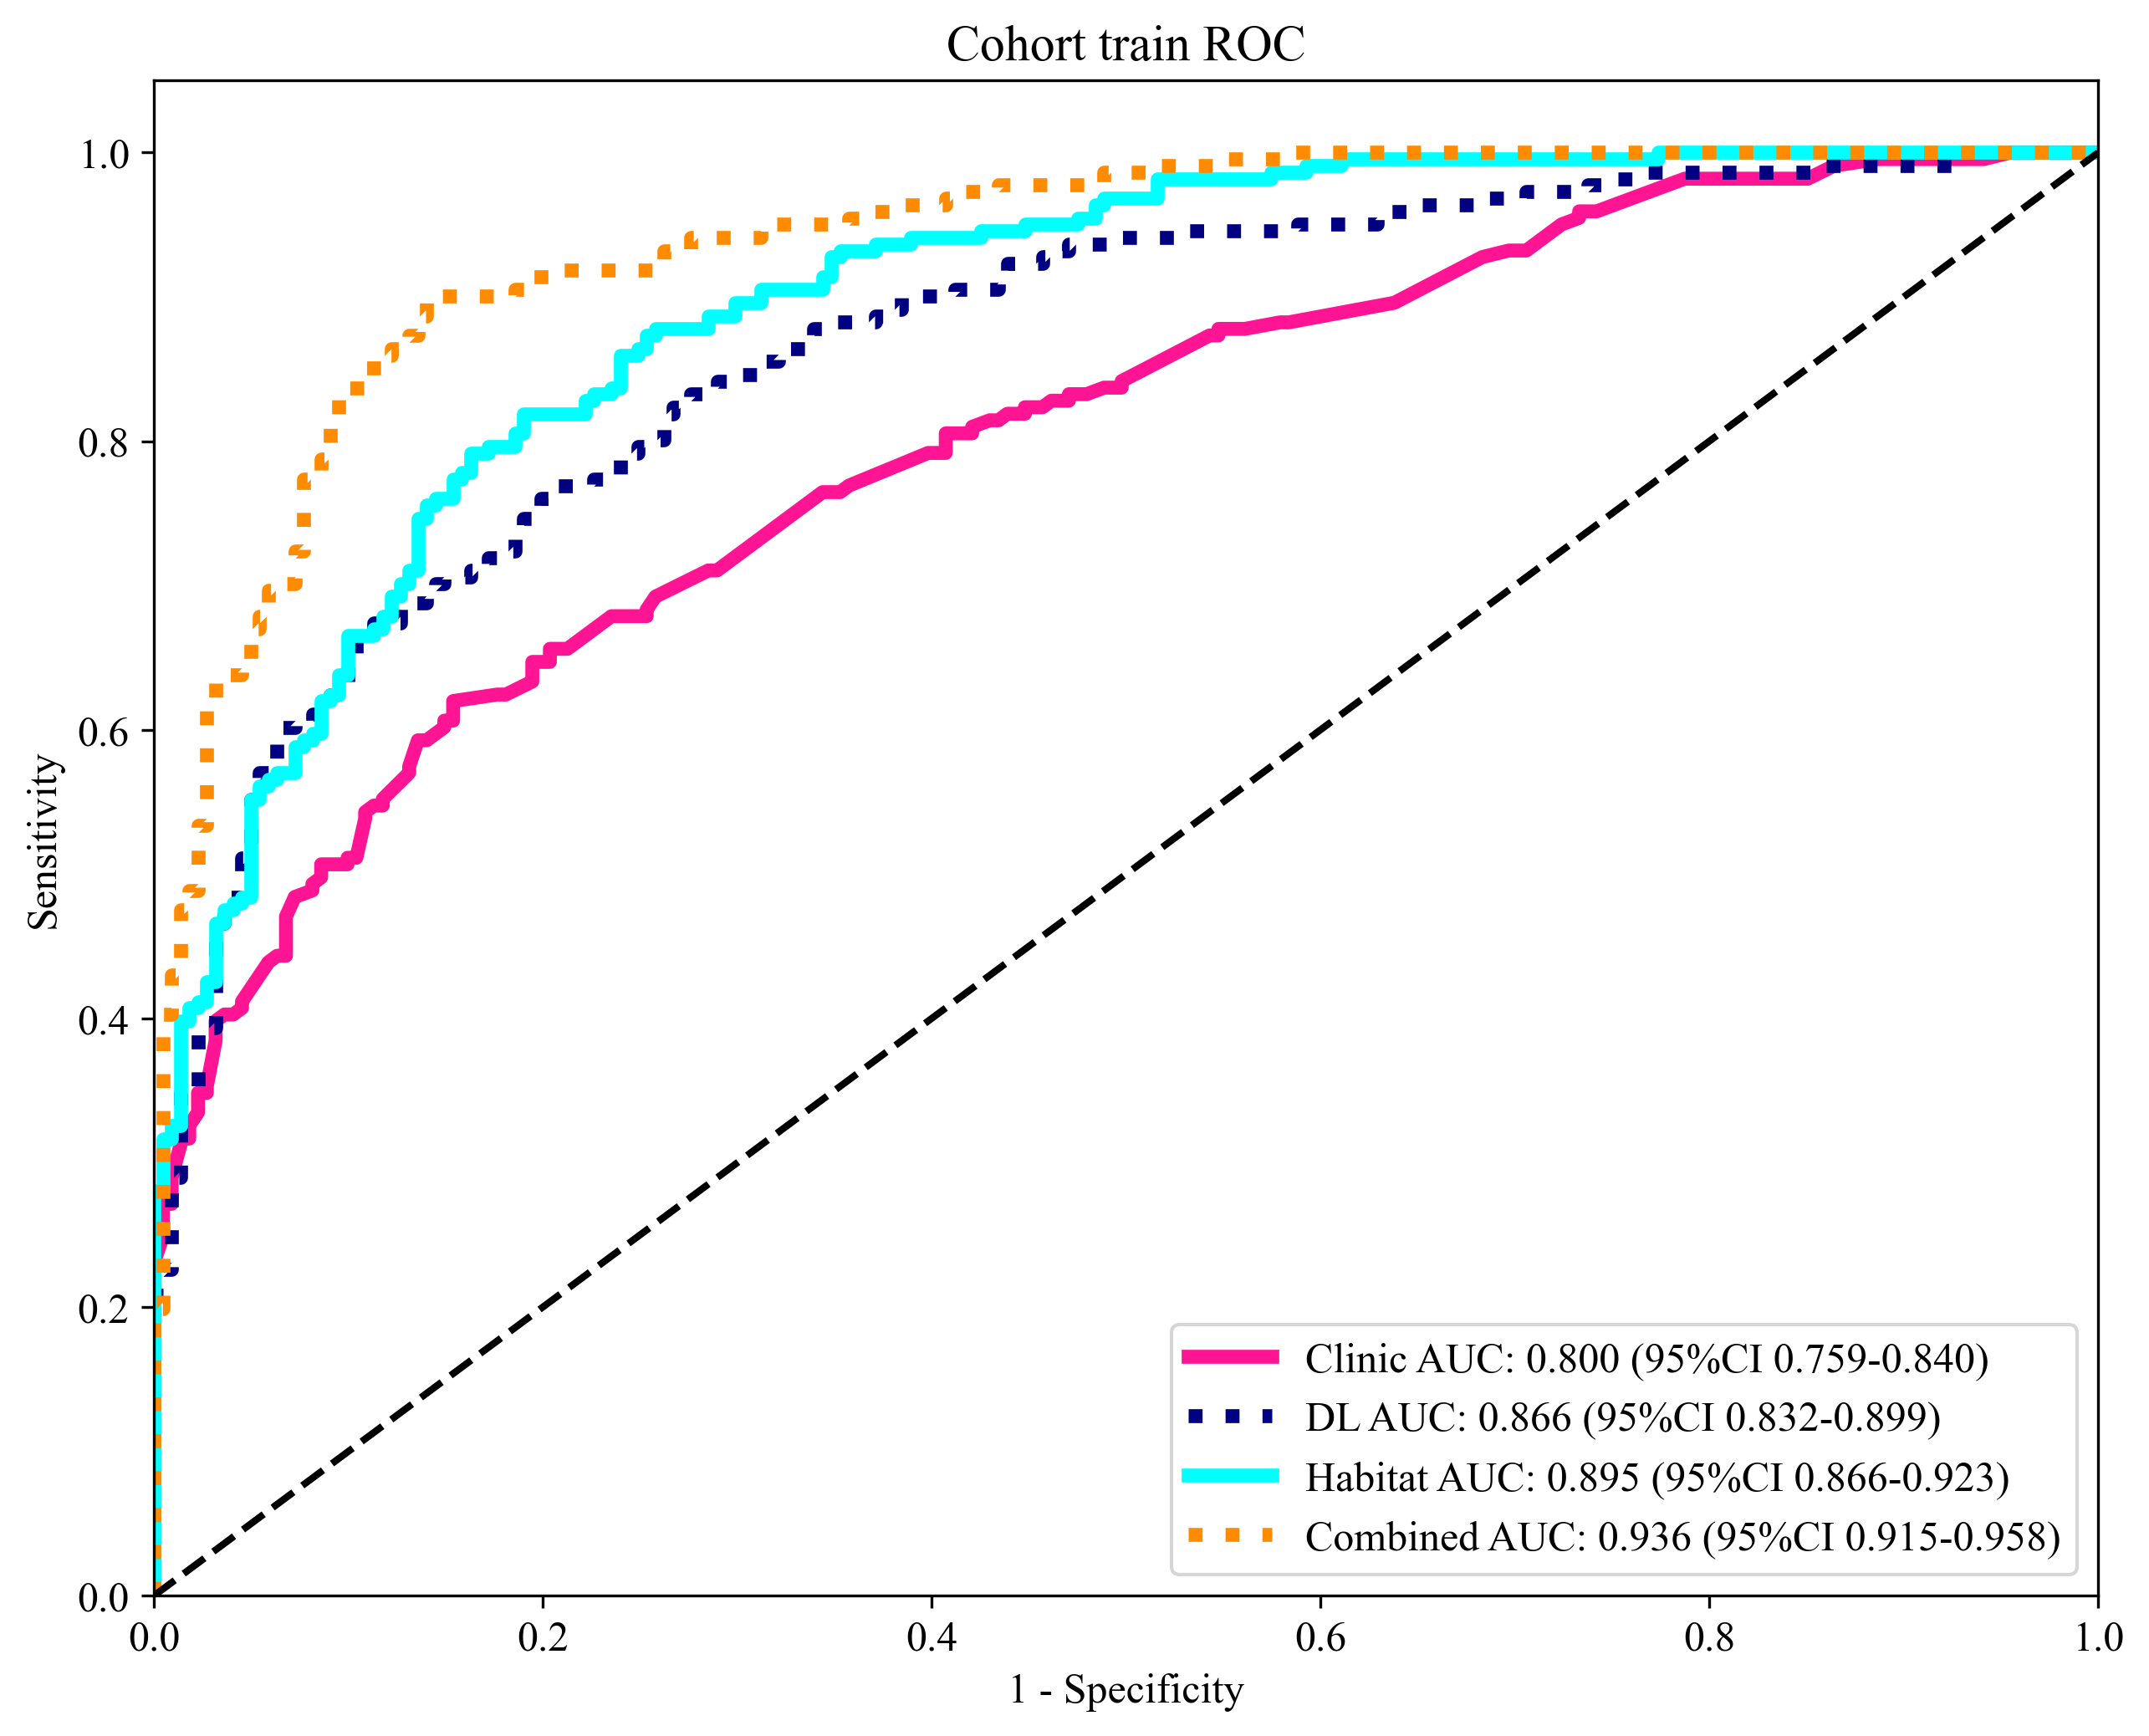

Signature  Accuracy    AUC           95% CI  Sensitivity  Specificity  \
0    Clinic     0.733  0.800  0.7593 - 0.8400        0.620        0.846   
1        DL     0.783  0.866  0.8324 - 0.8988        0.769        0.796   
2   Habitat     0.814  0.895  0.8663 - 0.9228        0.792        0.837   
3  Combined     0.880  0.936  0.9151 - 0.9577        0.900        0.860   

     PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0  0.801  0.690      0.801   0.620  0.699      0.547  train  
1  0.791  0.775      0.791   0.769  0.780      0.505  train  
2  0.829  0.801      0.829   0.792  0.810      0.509  train  
3  0.865  0.896      0.865   0.900  0.882      0.412  train

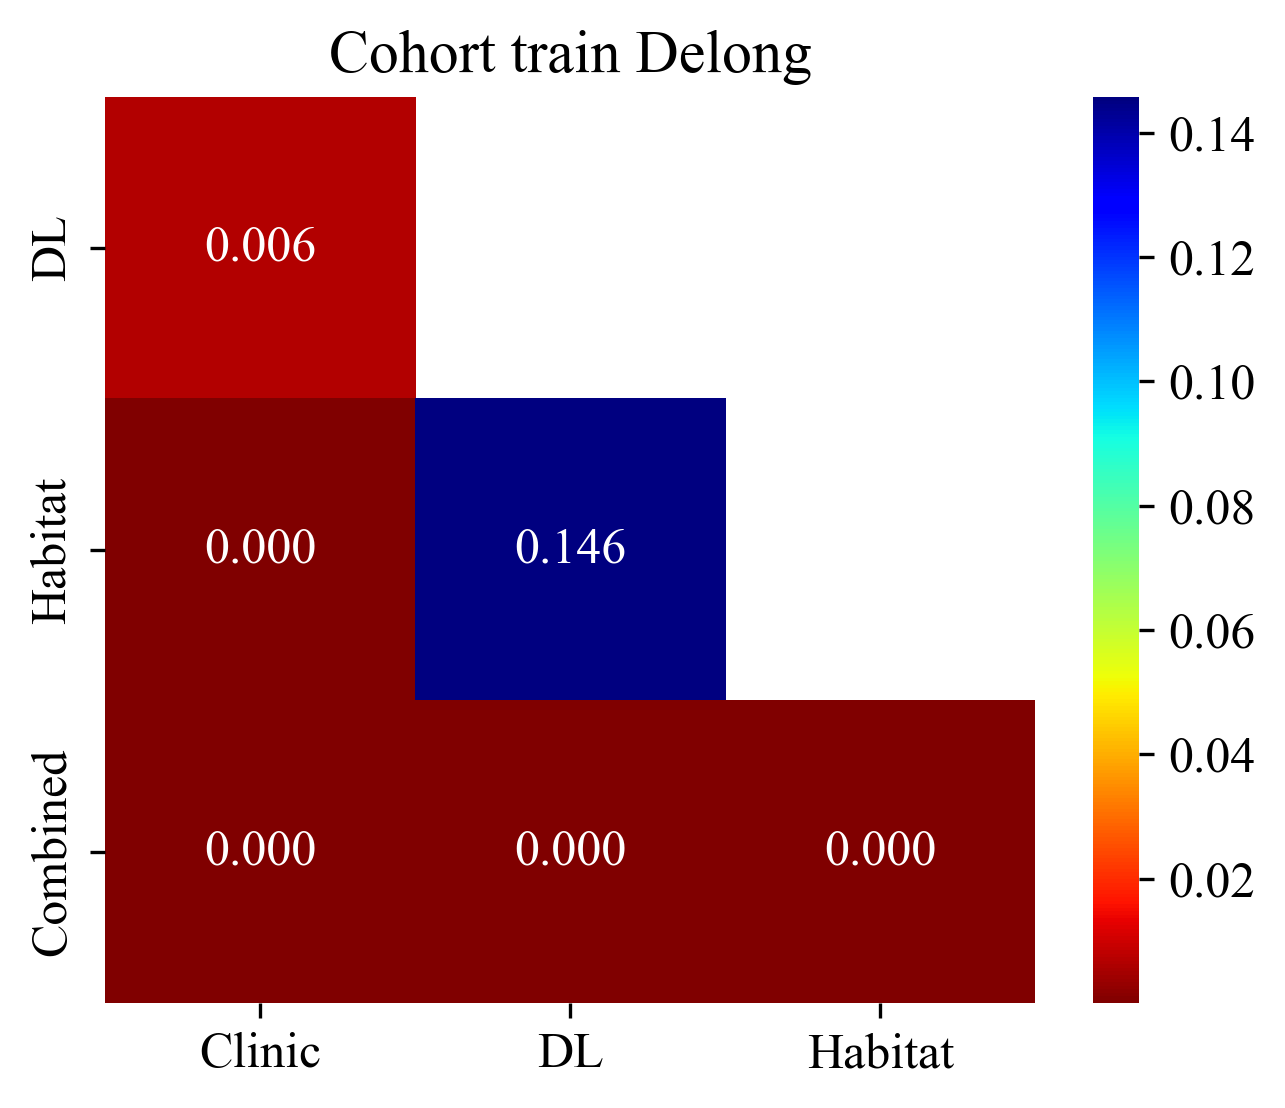

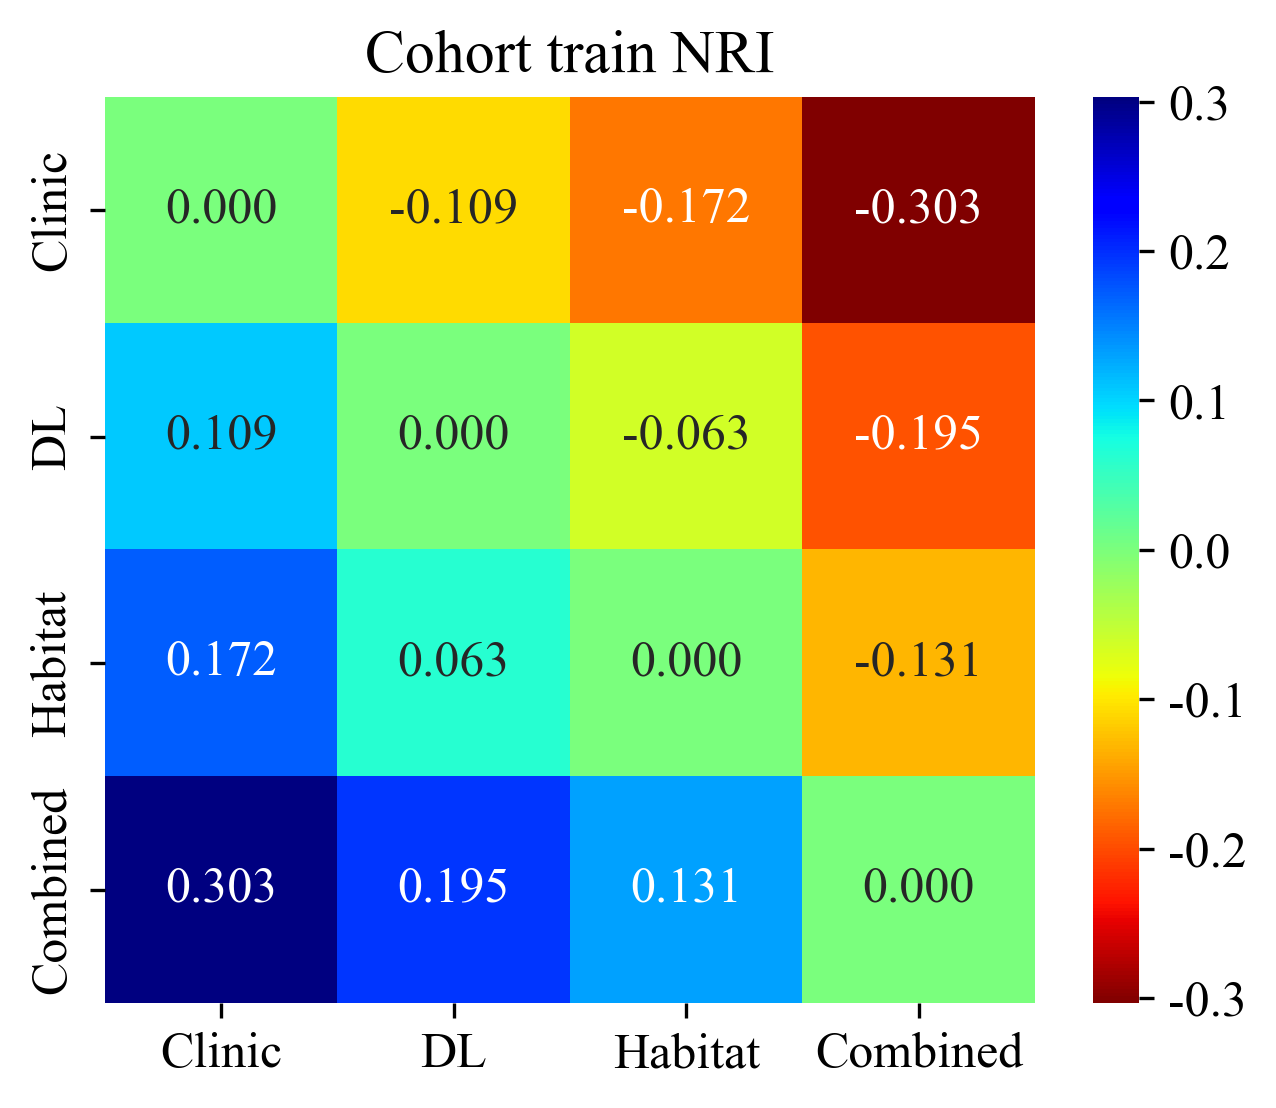

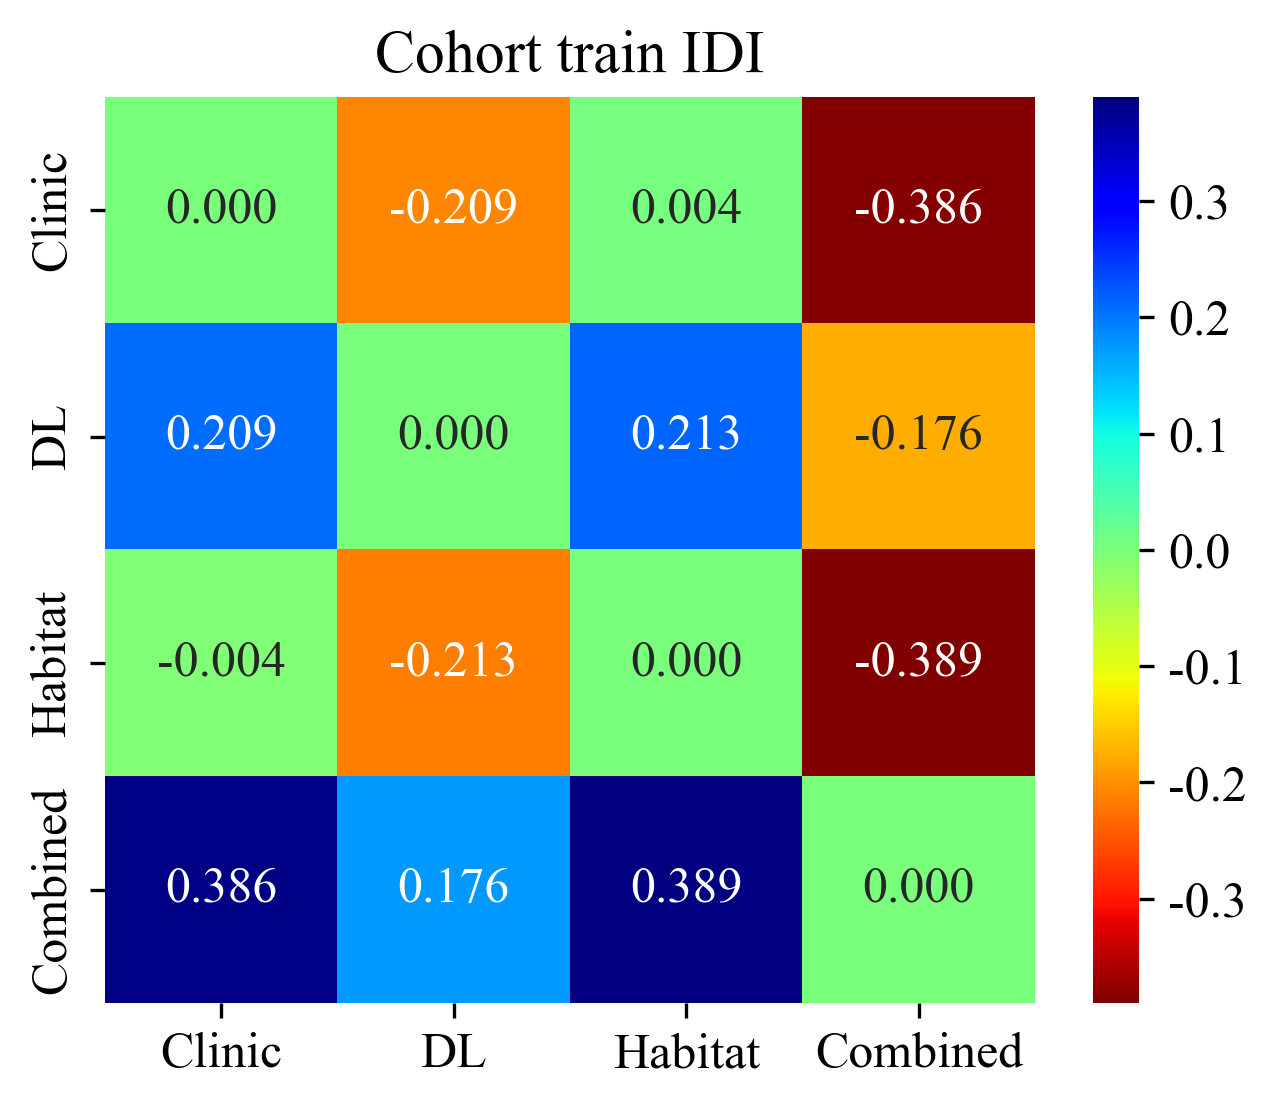

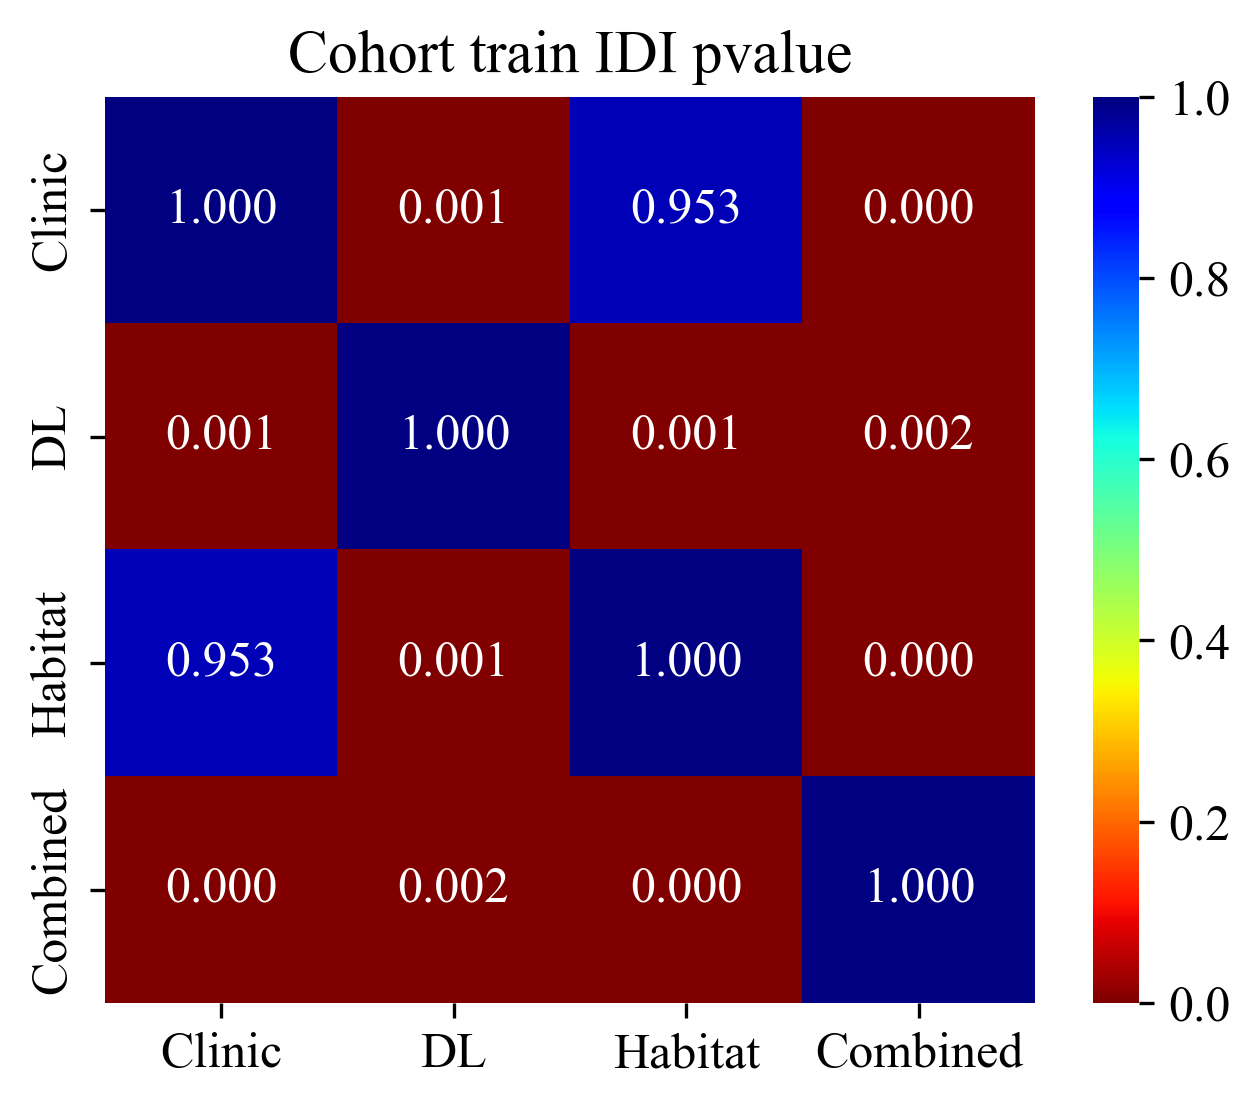

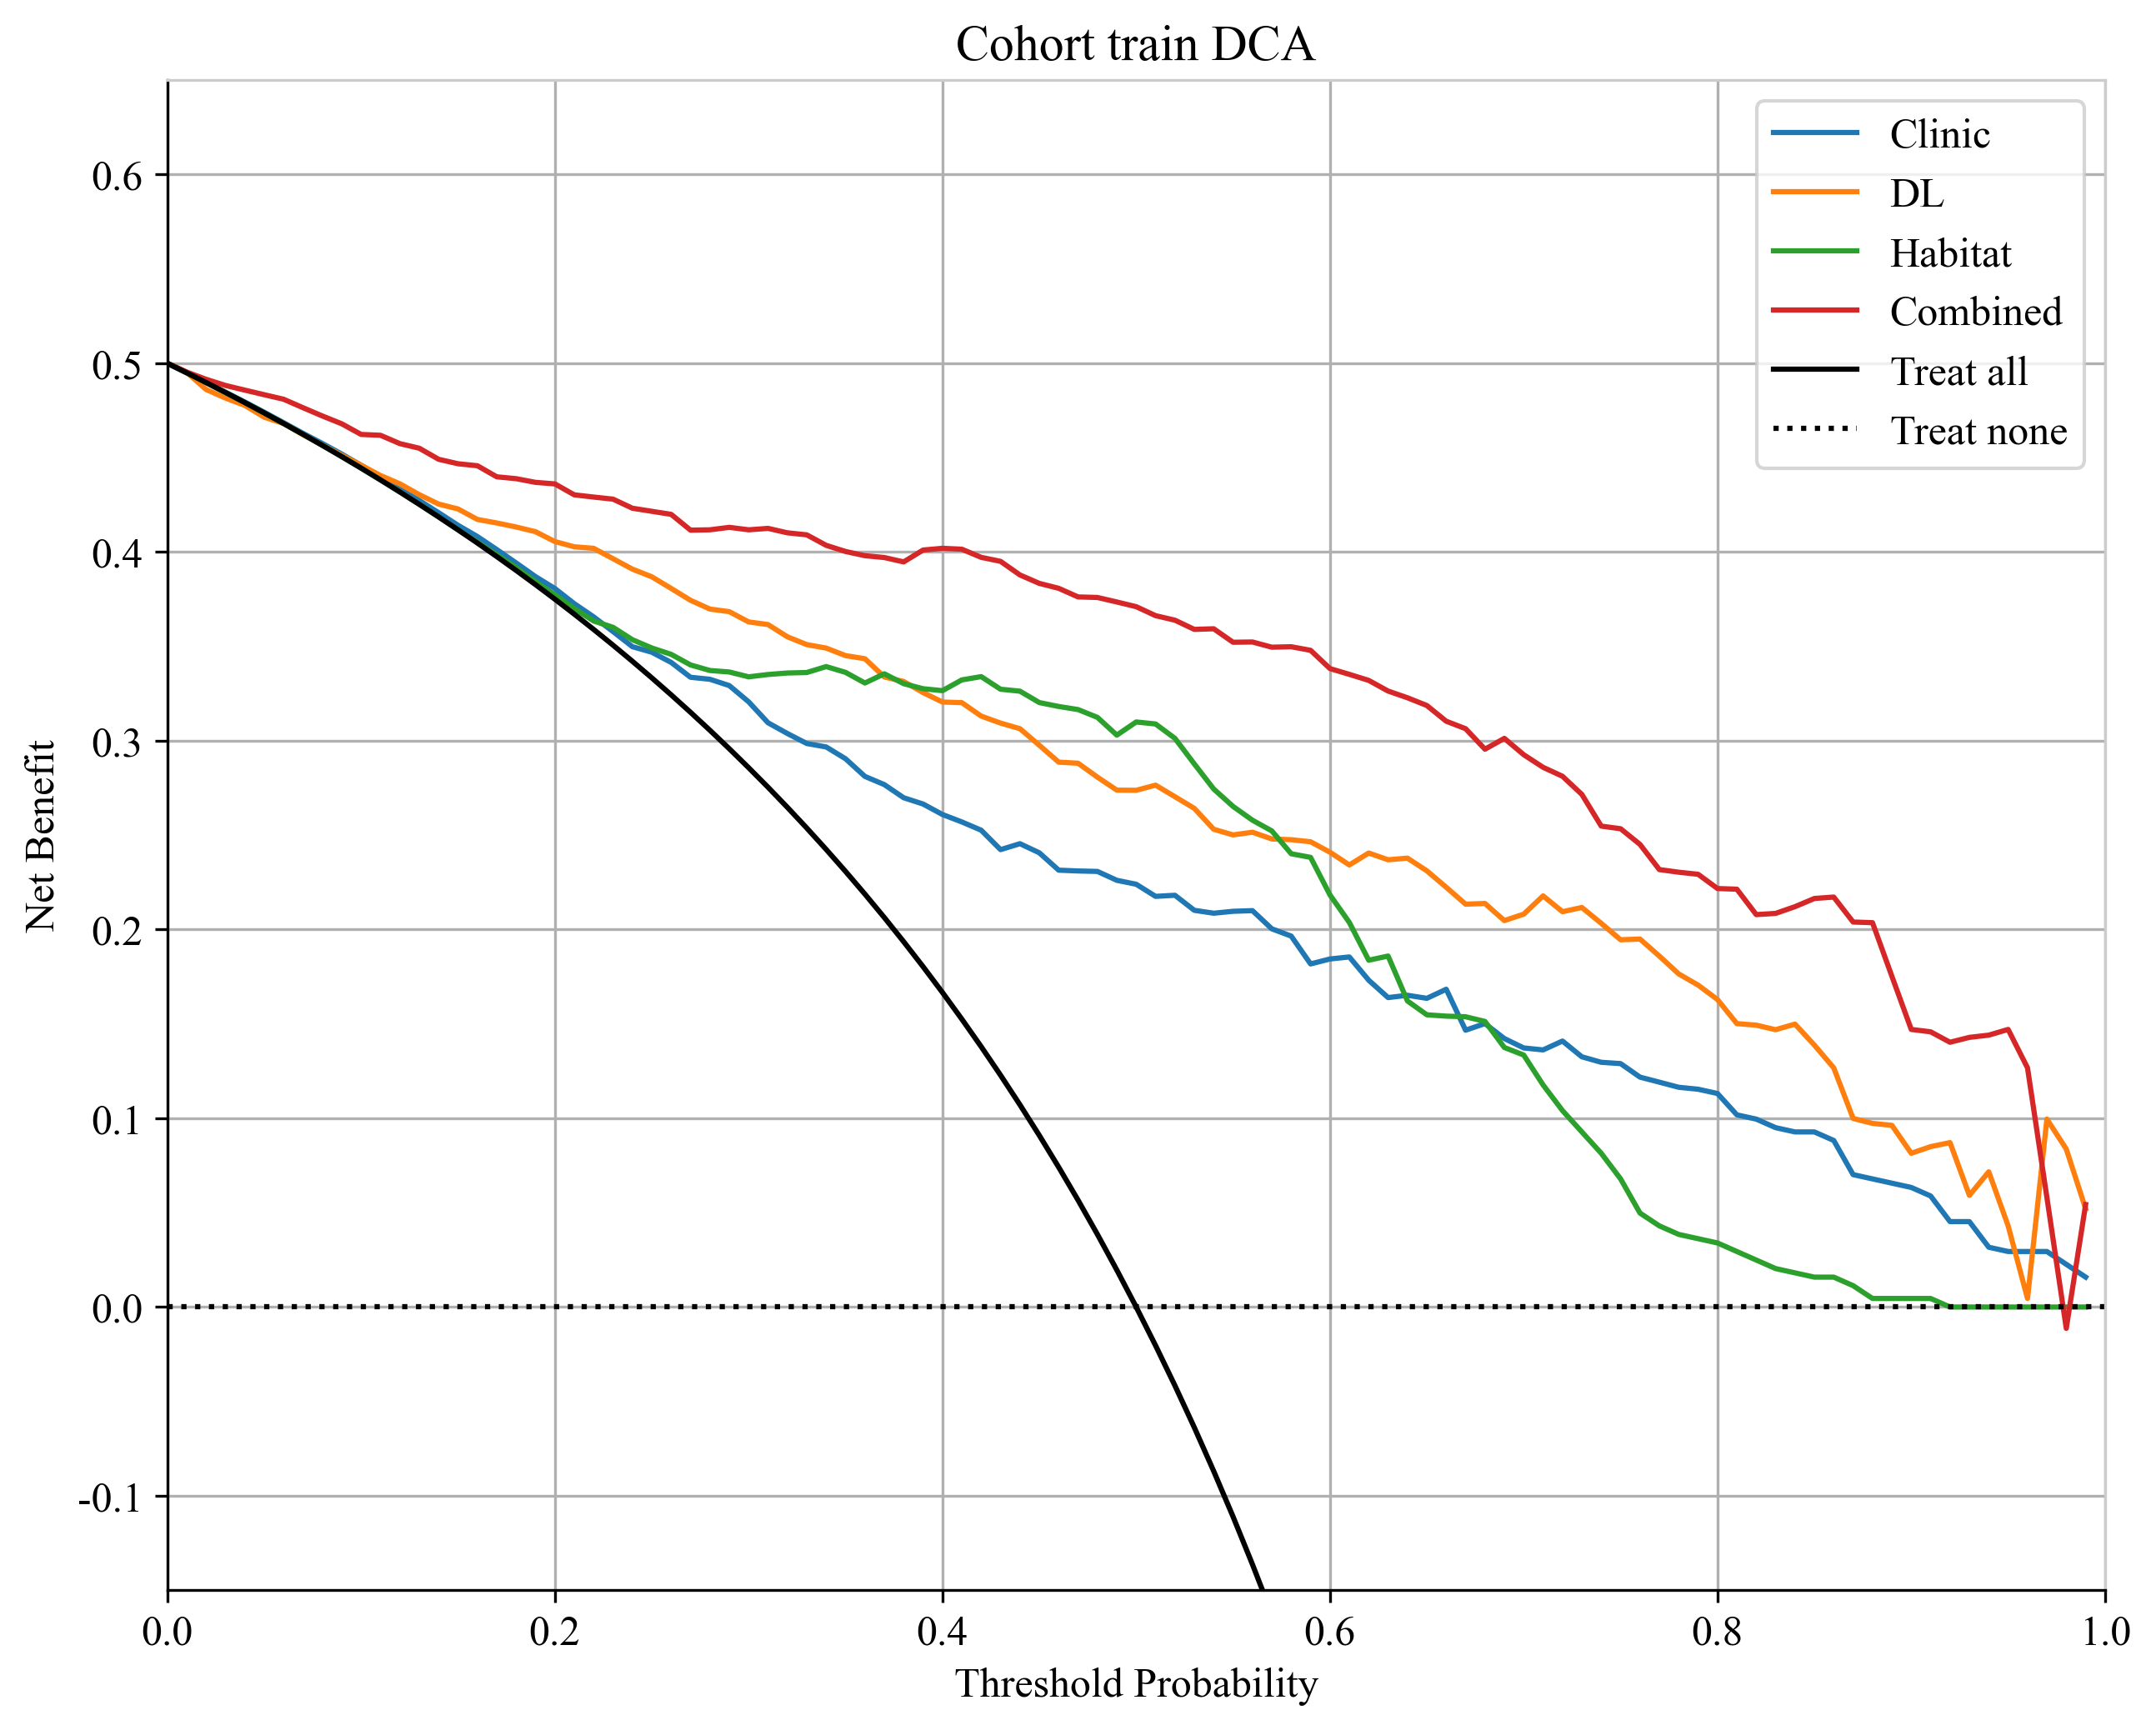

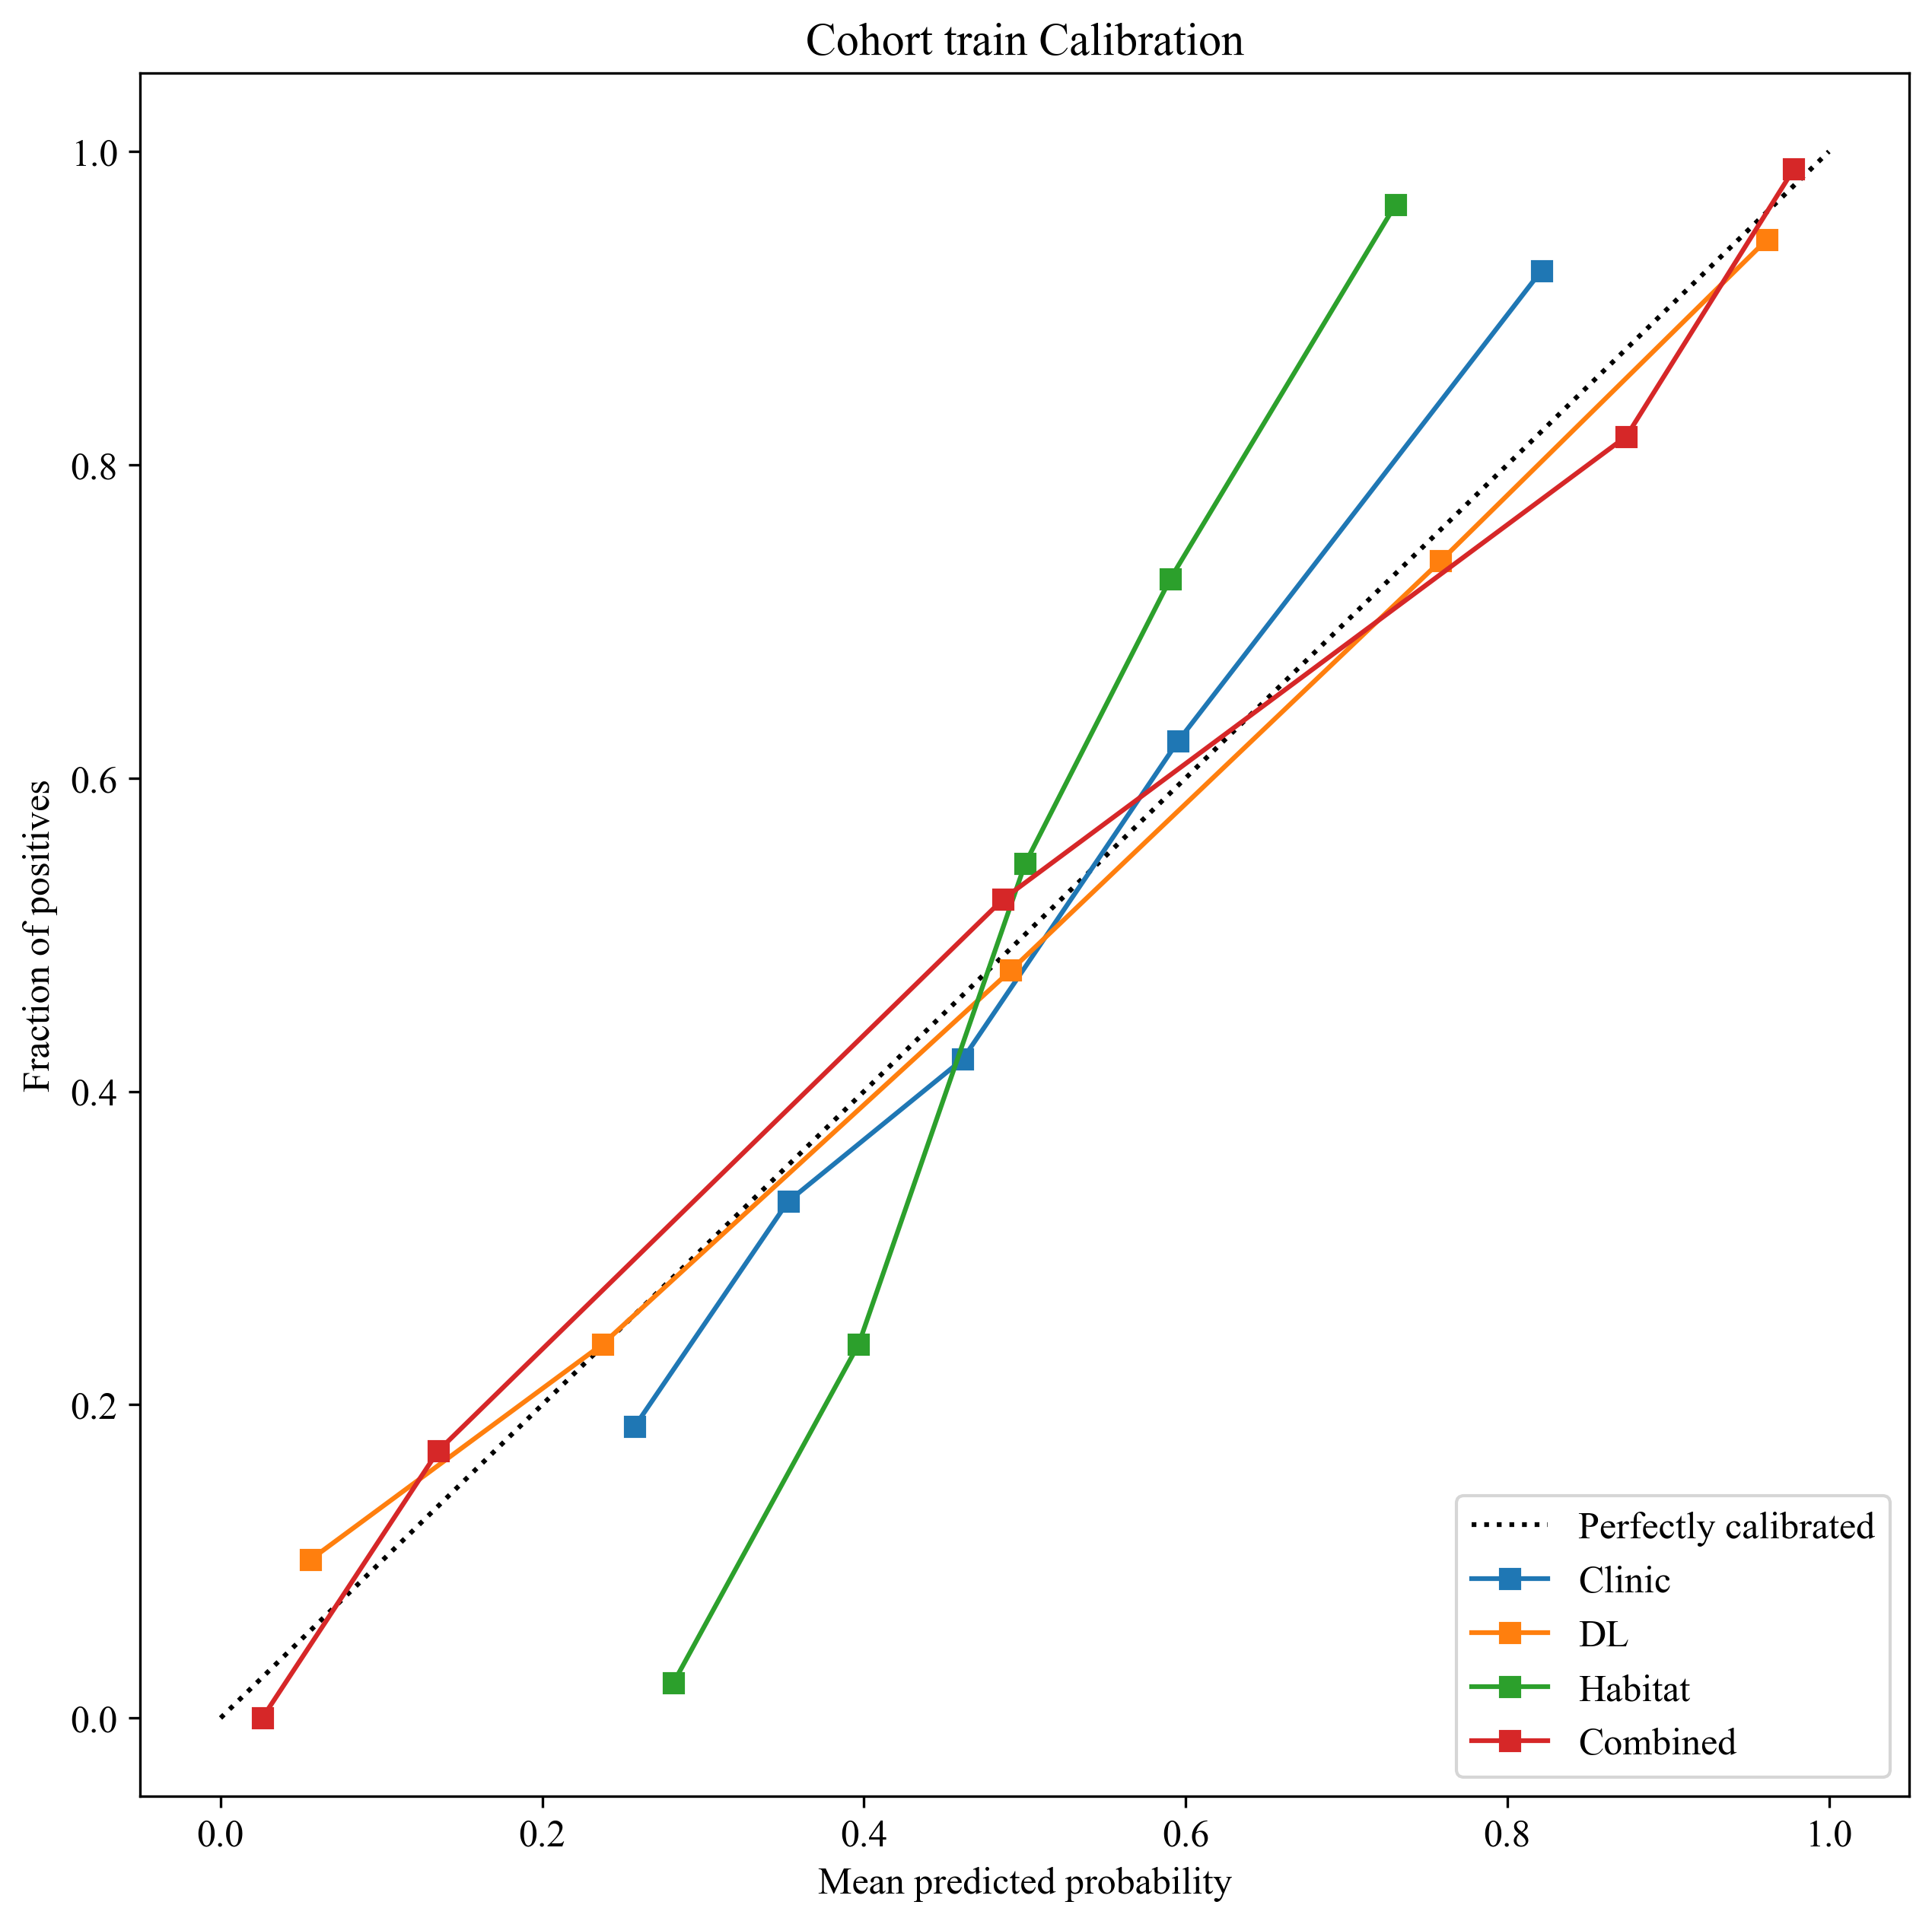

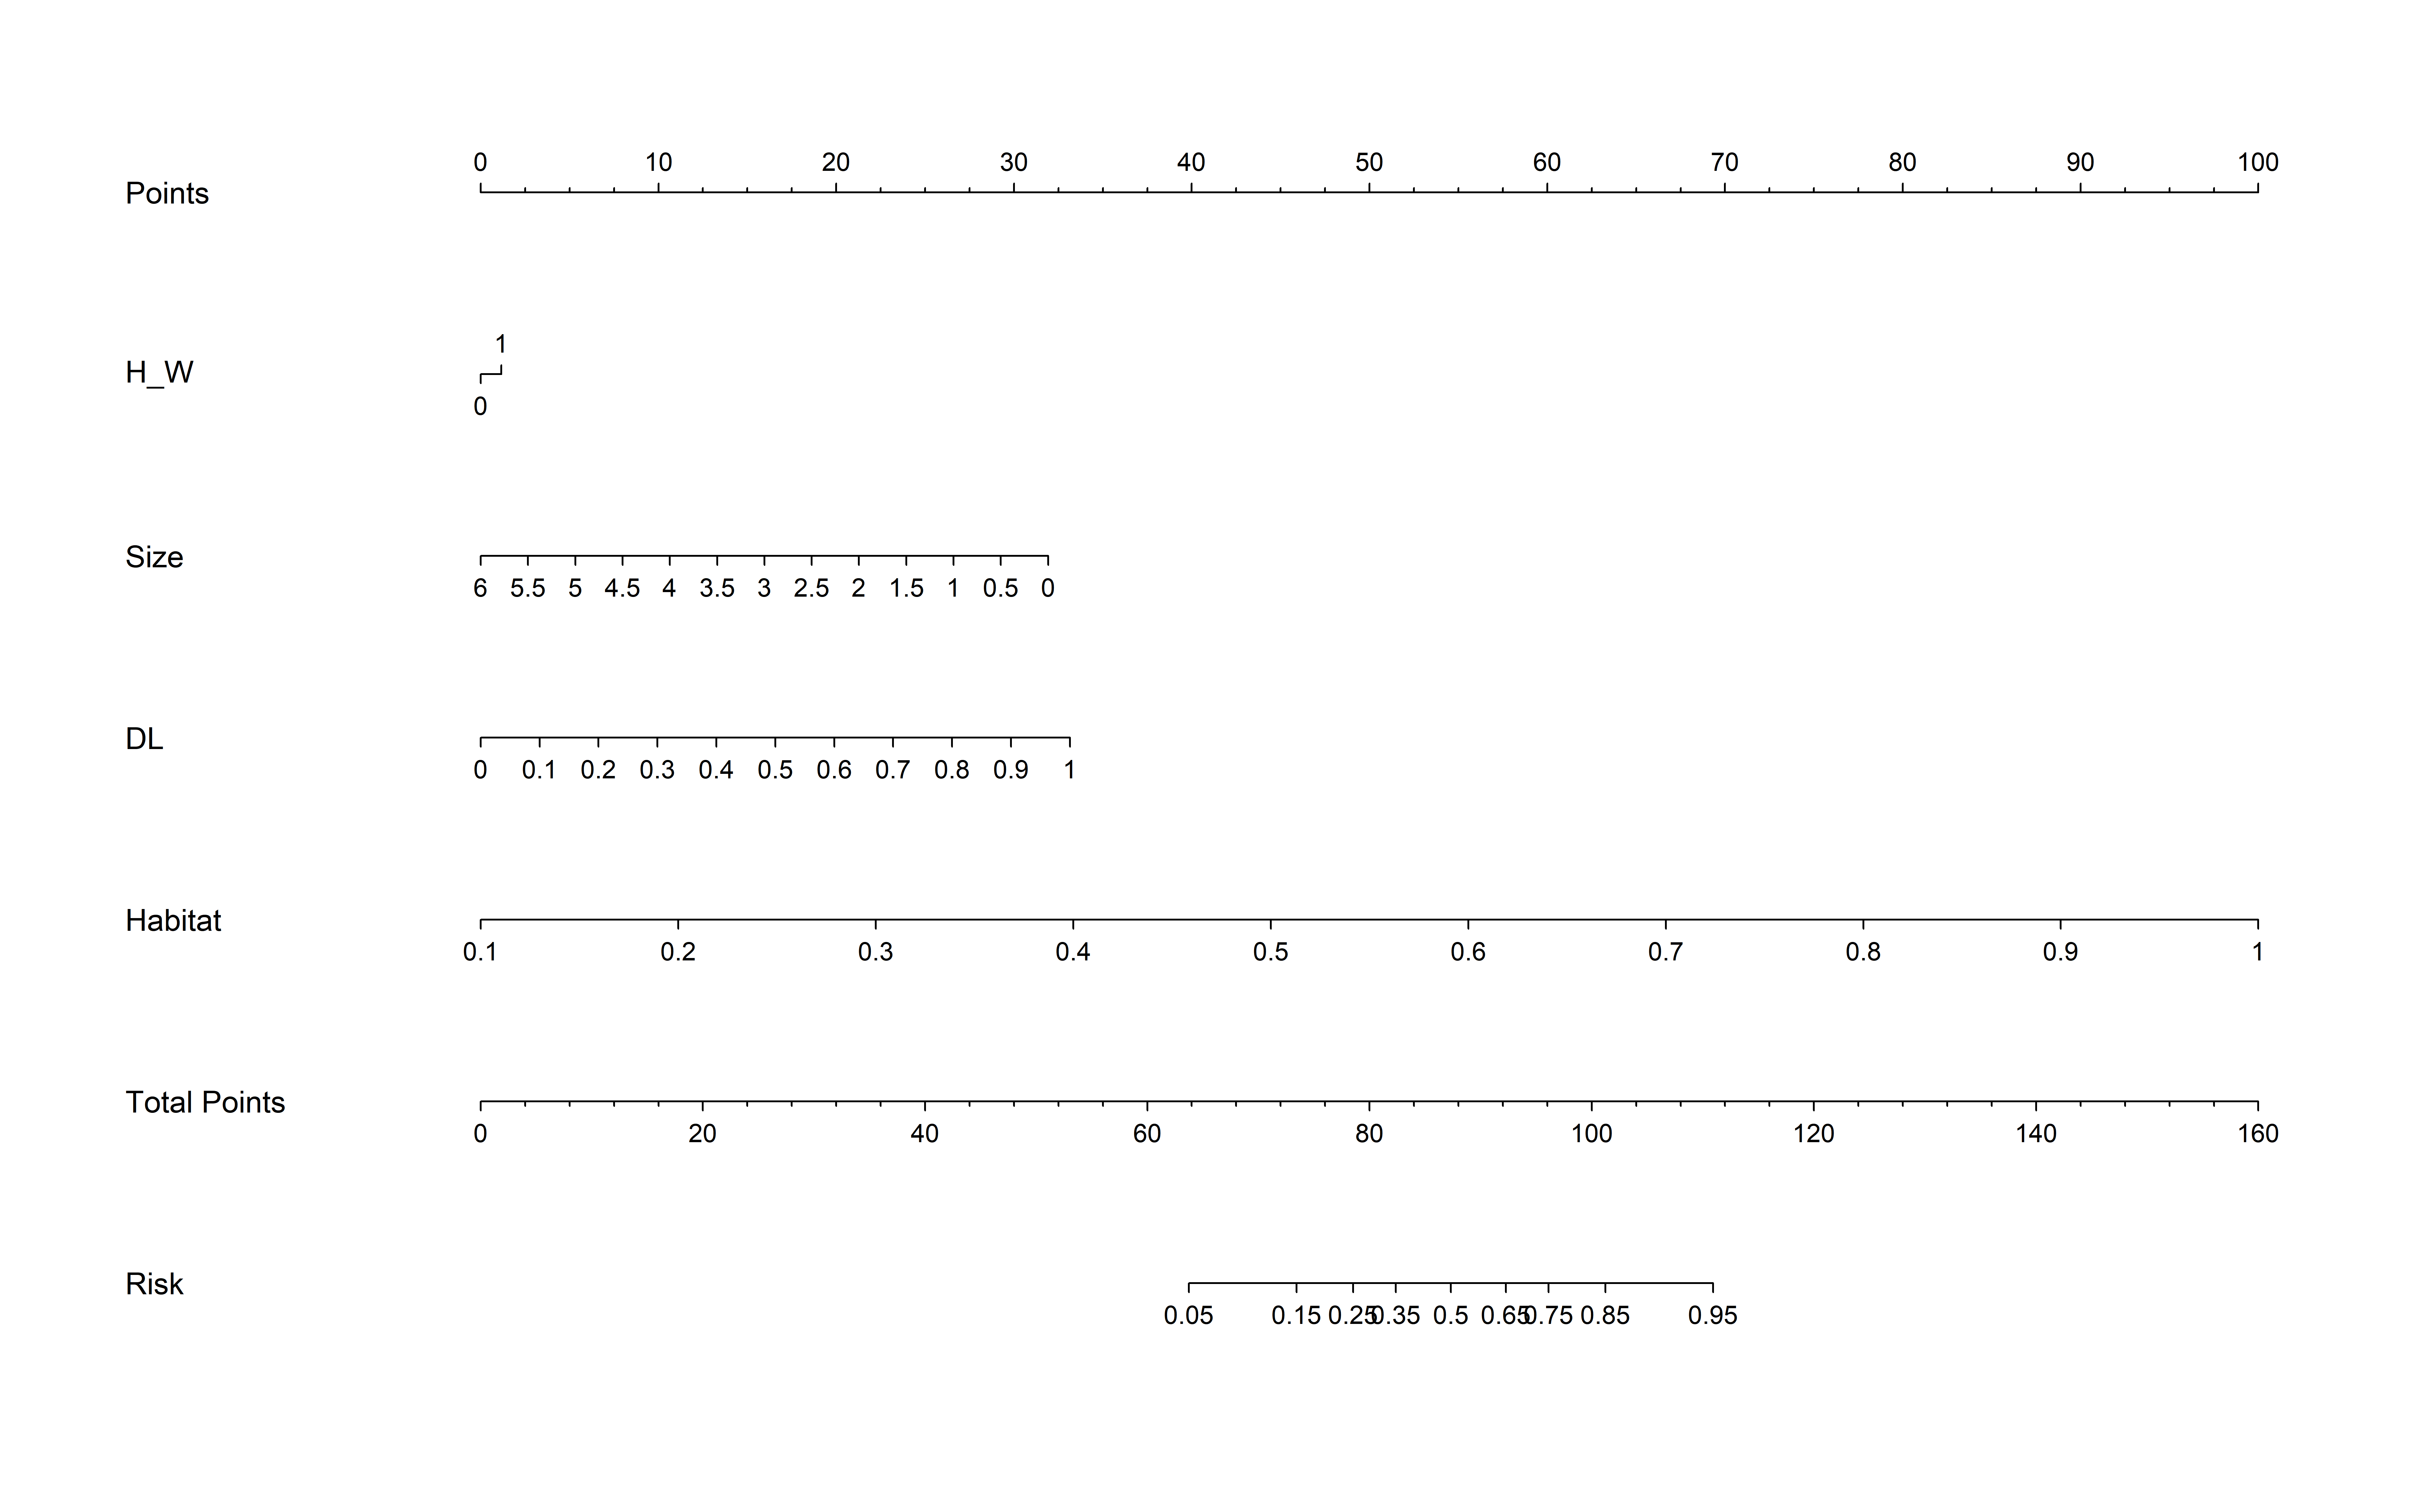

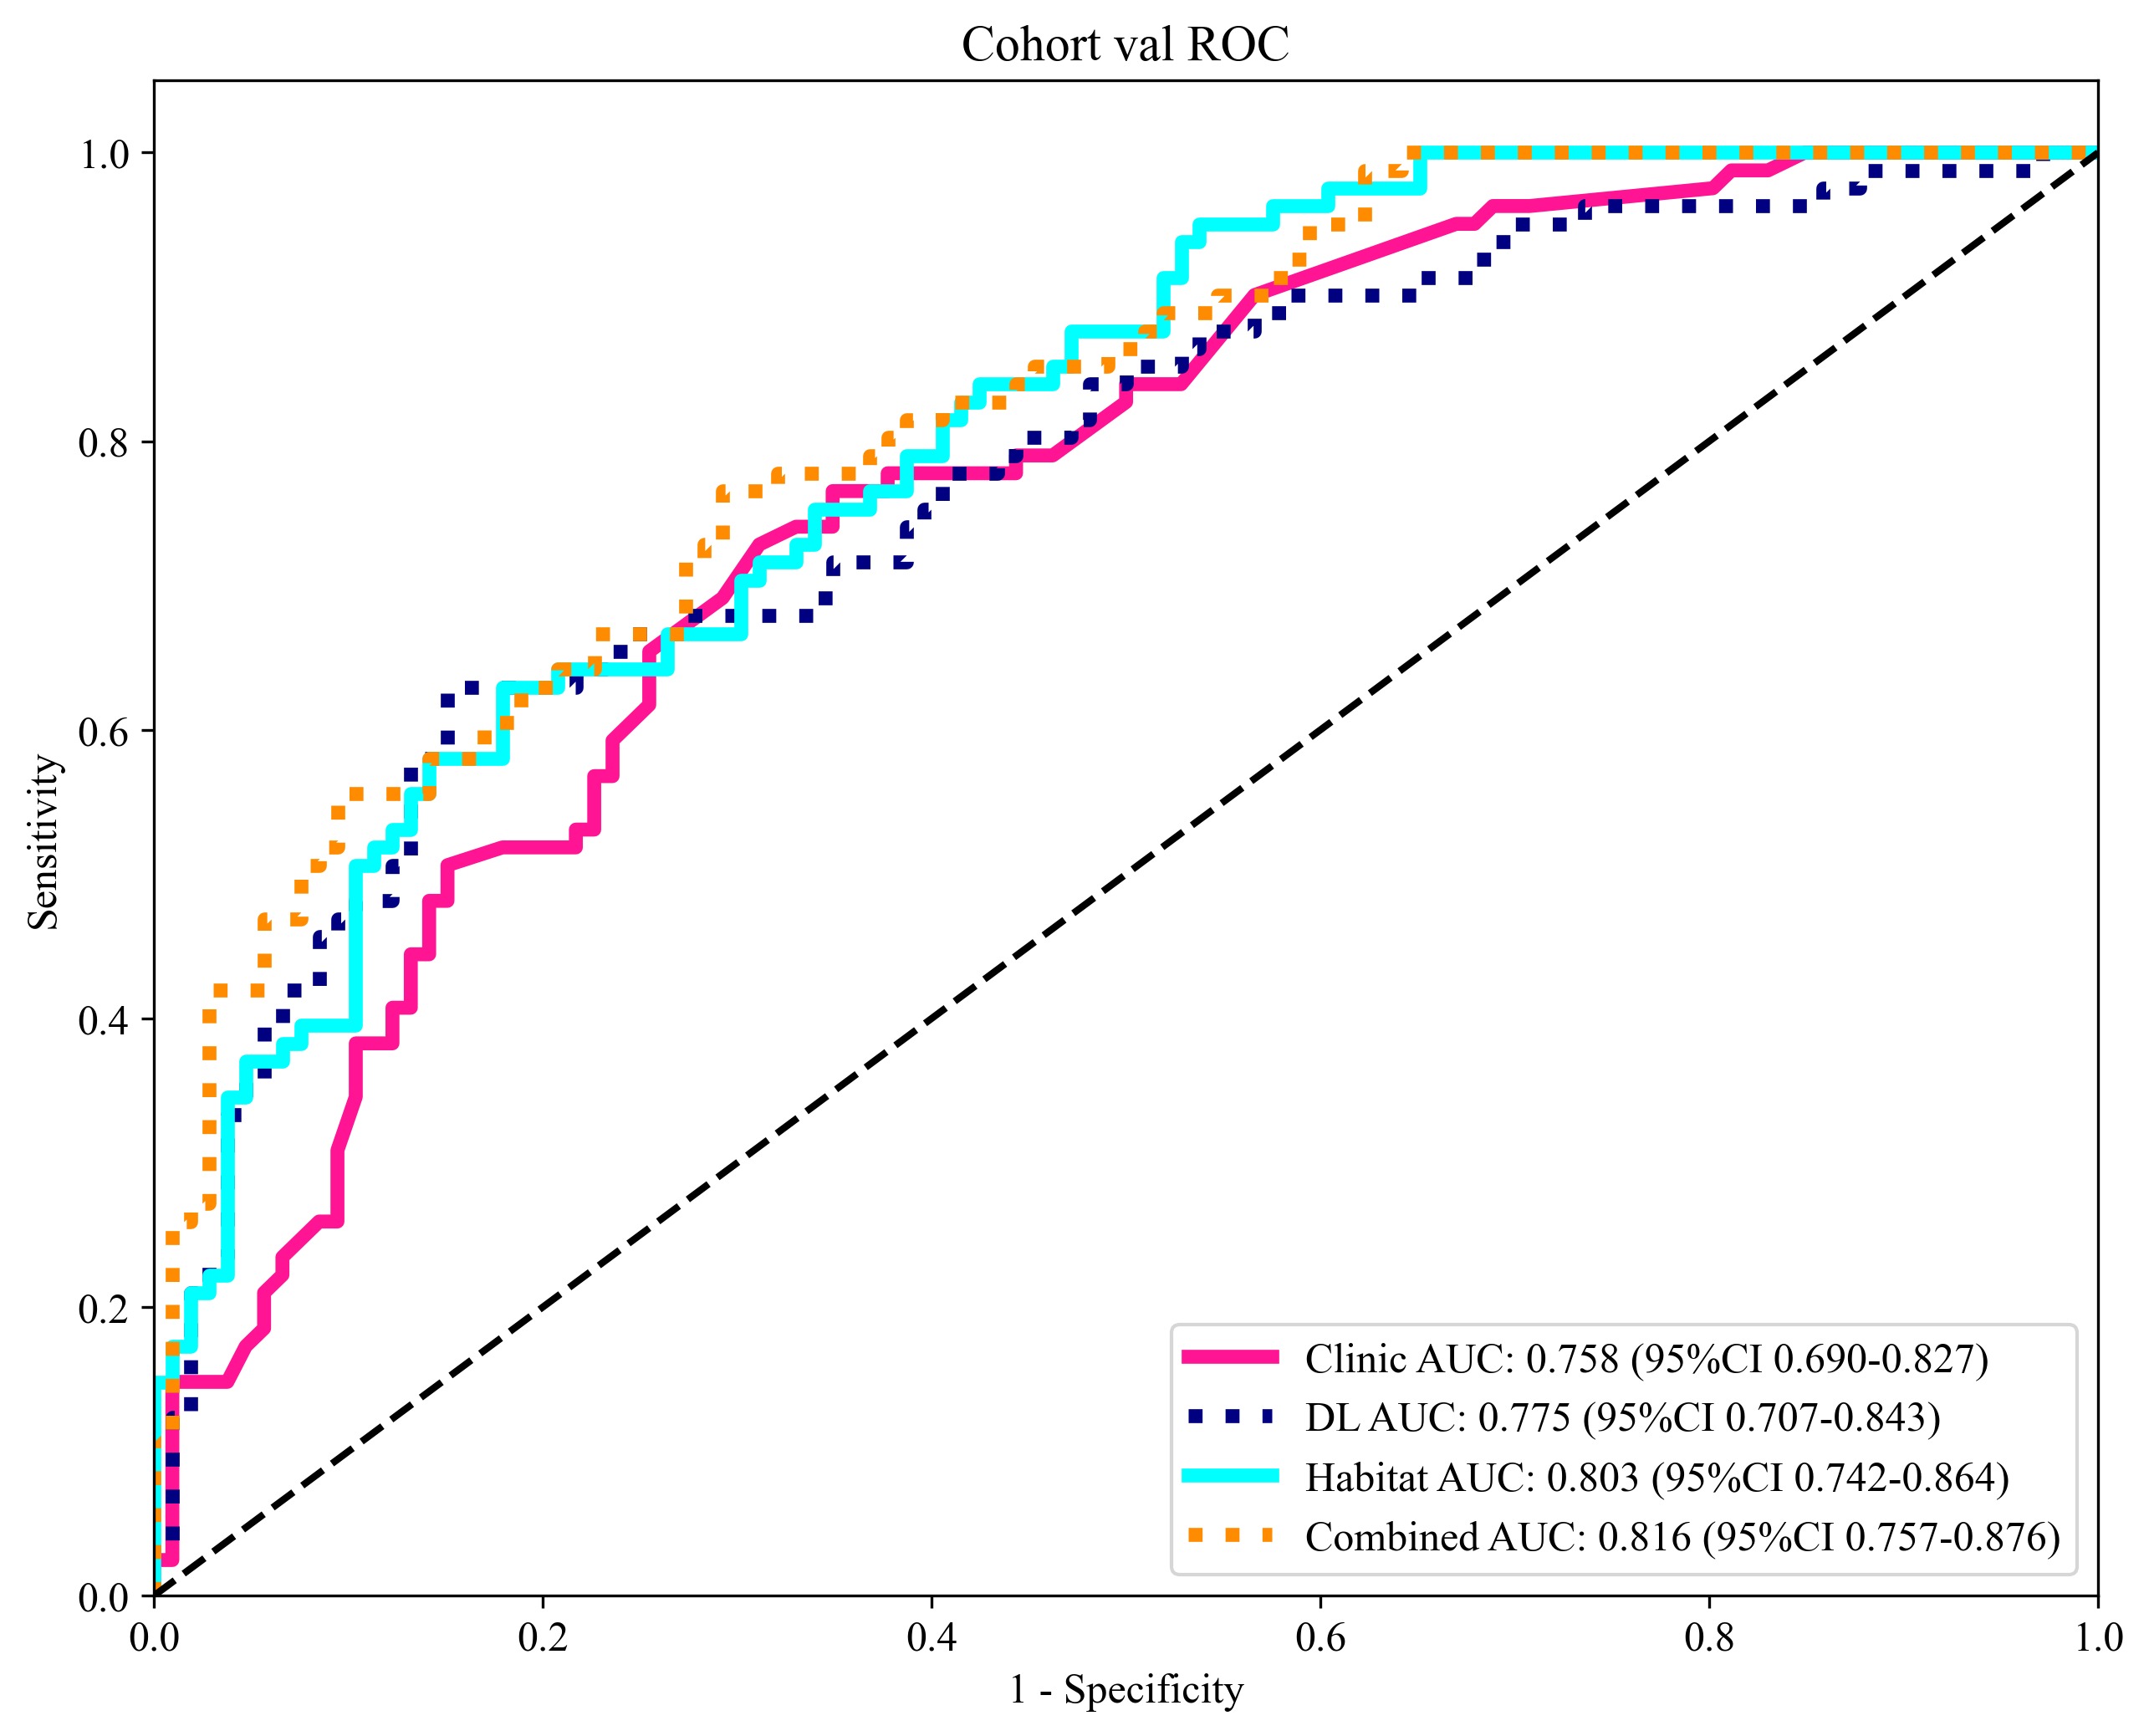

Signature  Accuracy    AUC           95% CI  Sensitivity  Specificity  \
0    Clinic     0.733  0.800  0.7593 - 0.8400        0.620        0.846   
1        DL     0.783  0.866  0.8324 - 0.8988        0.769        0.796   
2   Habitat     0.814  0.895  0.8663 - 0.9228        0.792        0.837   
3  Combined     0.880  0.936  0.9151 - 0.9577        0.900        0.860   
4    Clinic     0.706  0.758  0.6902 - 0.8266        0.728        0.689   
5        DL     0.754  0.775  0.7072 - 0.8428        0.630        0.849   
6   Habitat     0.738  0.803  0.7422 - 0.8641        0.630        0.821   
7  Combined     0.733  0.816  0.7569 - 0.8755        0.765        0.708   

     PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0  0.801  0.690      0.801   0.620  0.699      0.547  train  
1  0.791  0.775      0.791   0.769  0.780      0.505  train  
2  0.829  0.801      0.829   0.792  0.810      0.509  train  
3  0.865  0.896      0.865   0.900  0.882      0.412  train  
4  0.641  0.768      0.641   0.728  0.682      0.445    val  
5  0.761  0.750      0.761   0.630  0.689      0.577    val  
6  0.729  0.744      0.729   0.630  0.675      0.558    val  
7  0.667  0.798      0.667   0.765  0.713      0.382    val

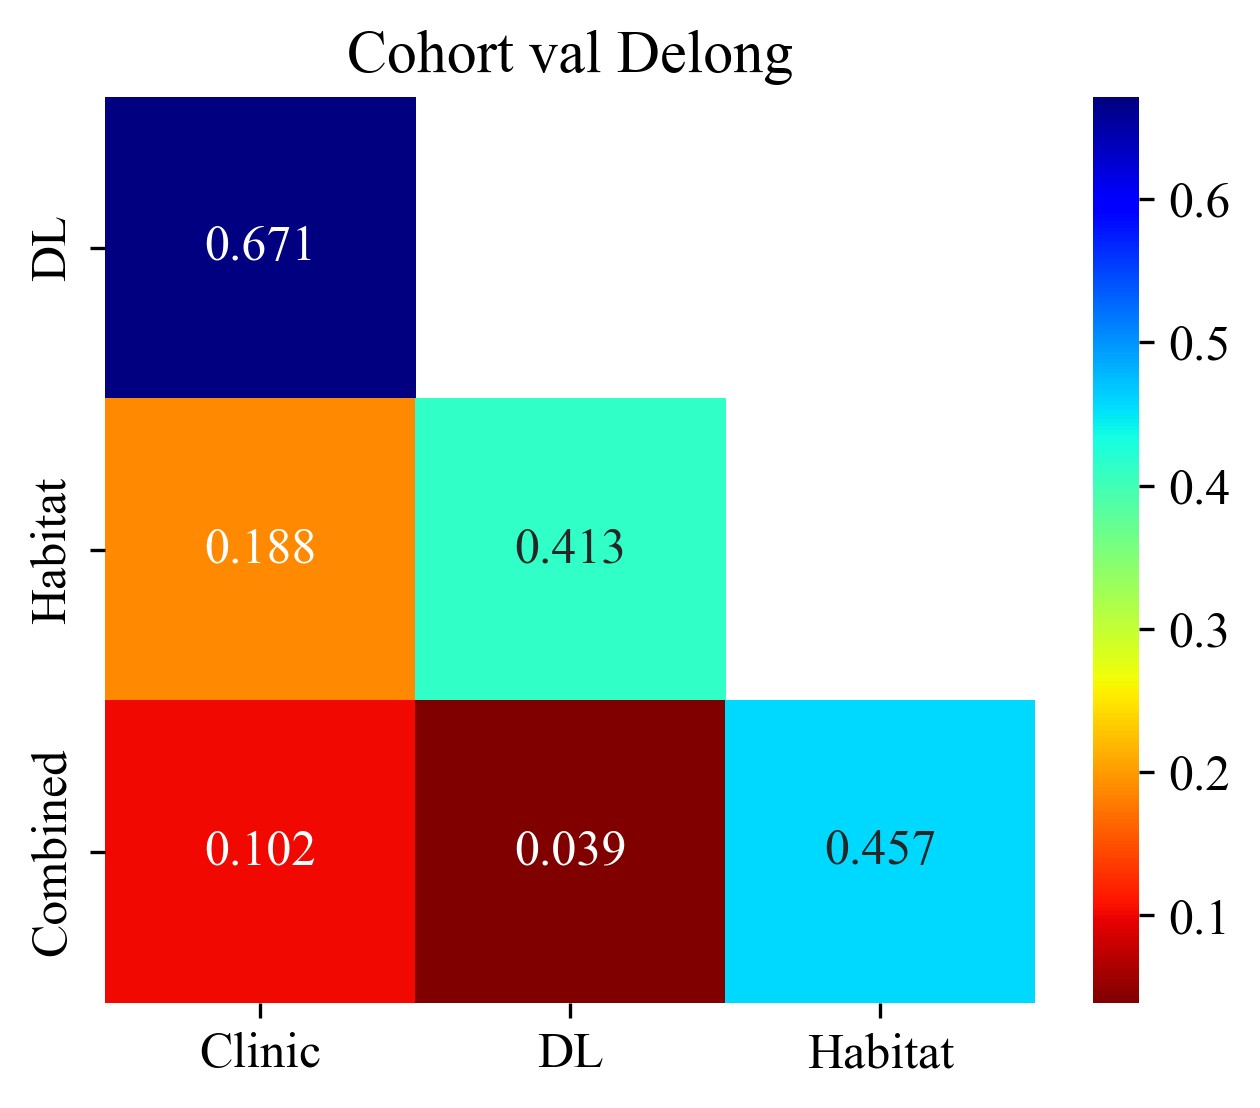

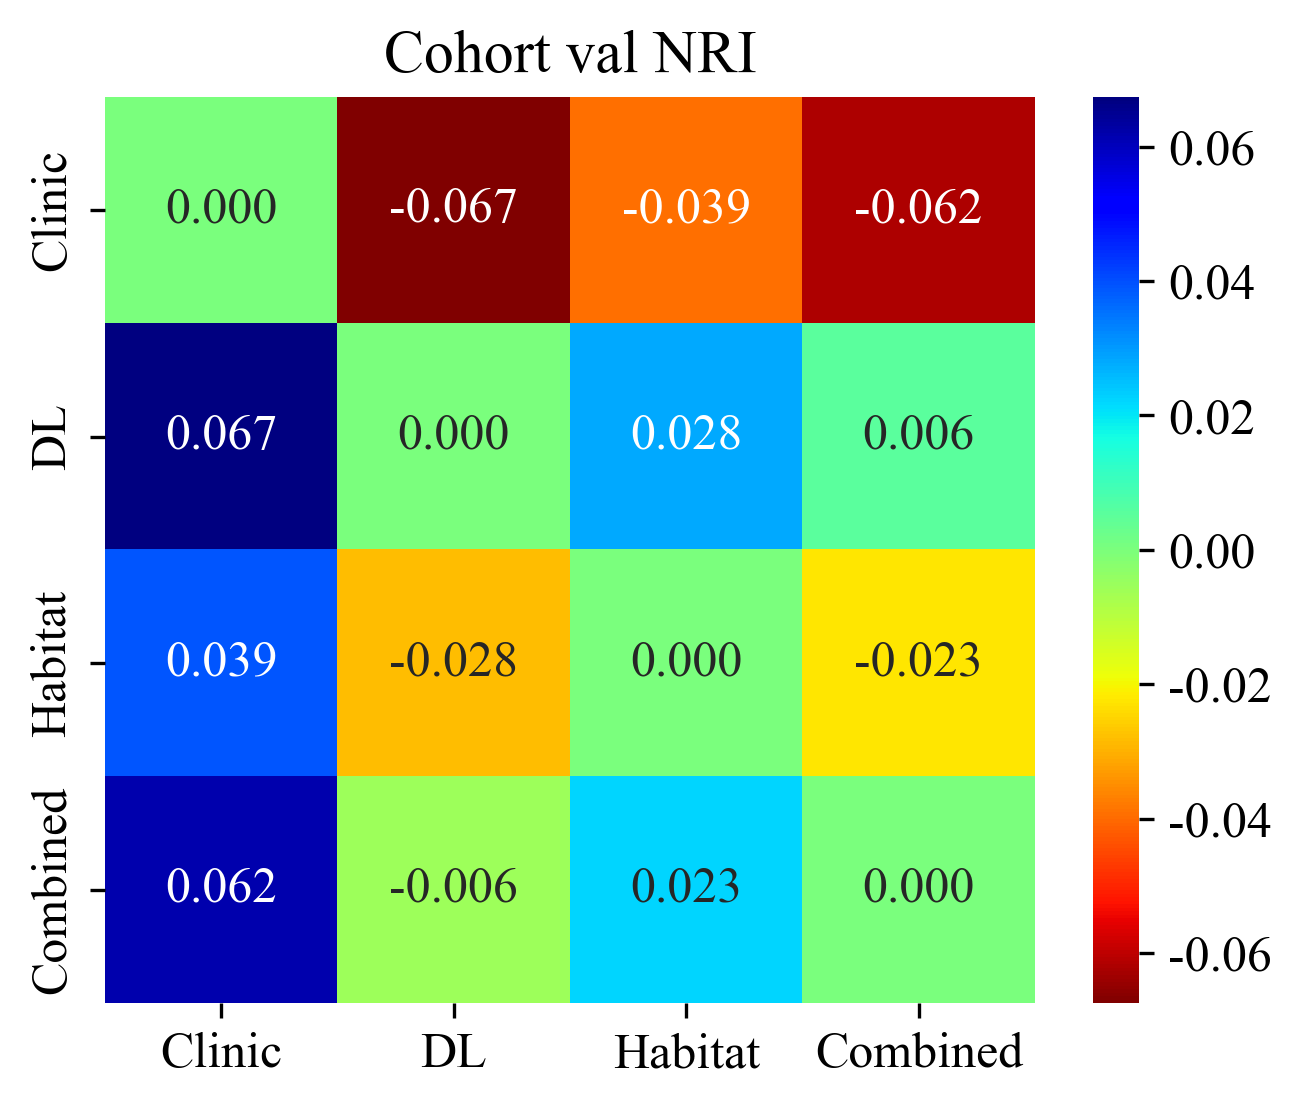

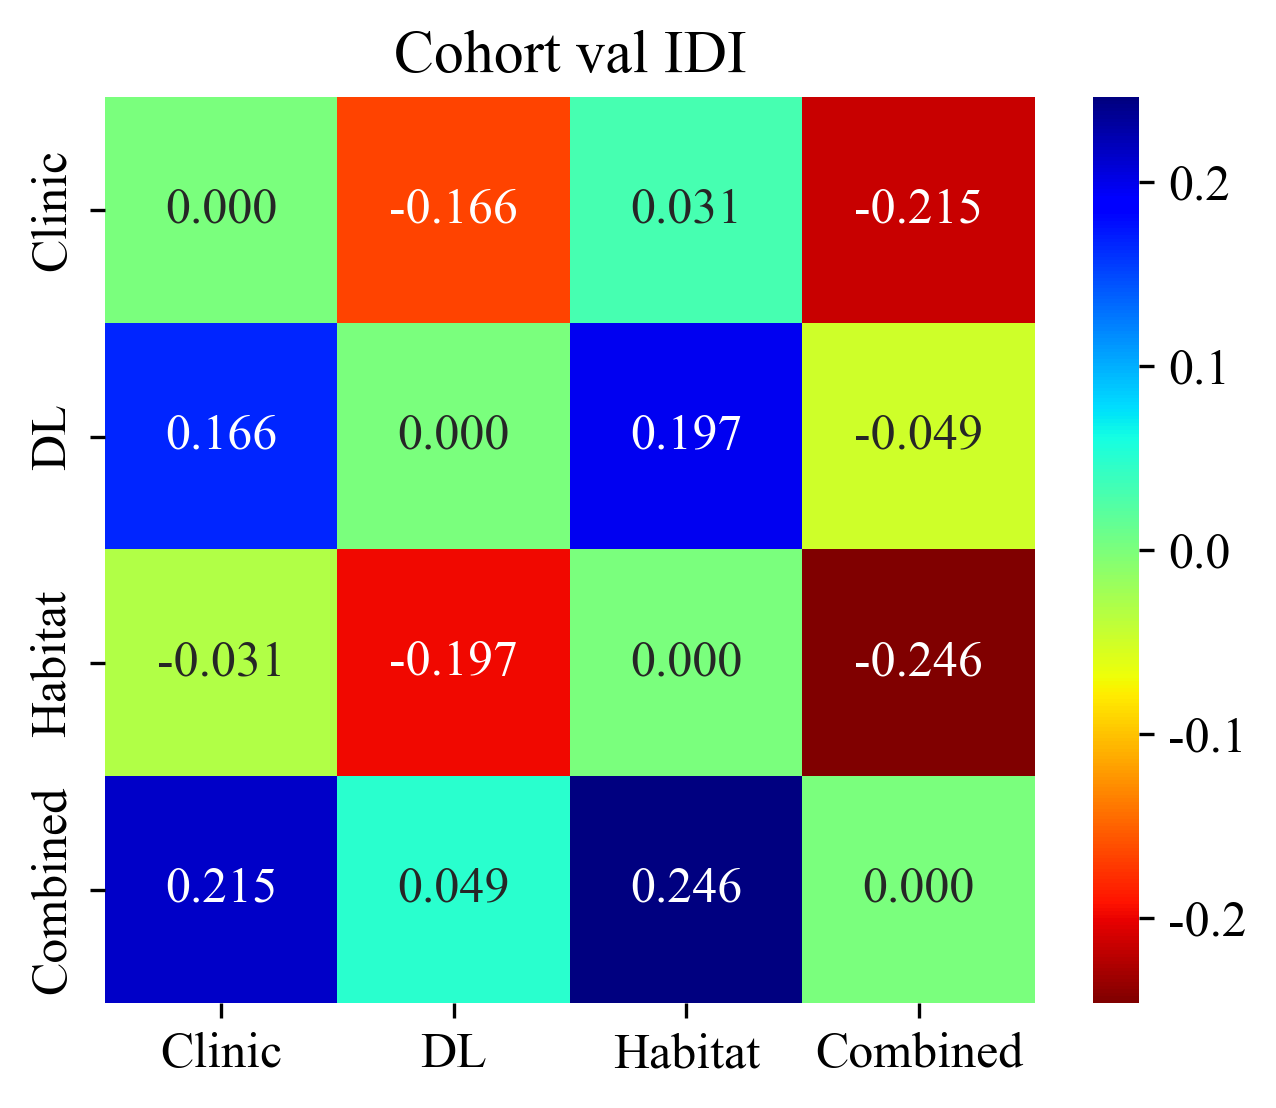

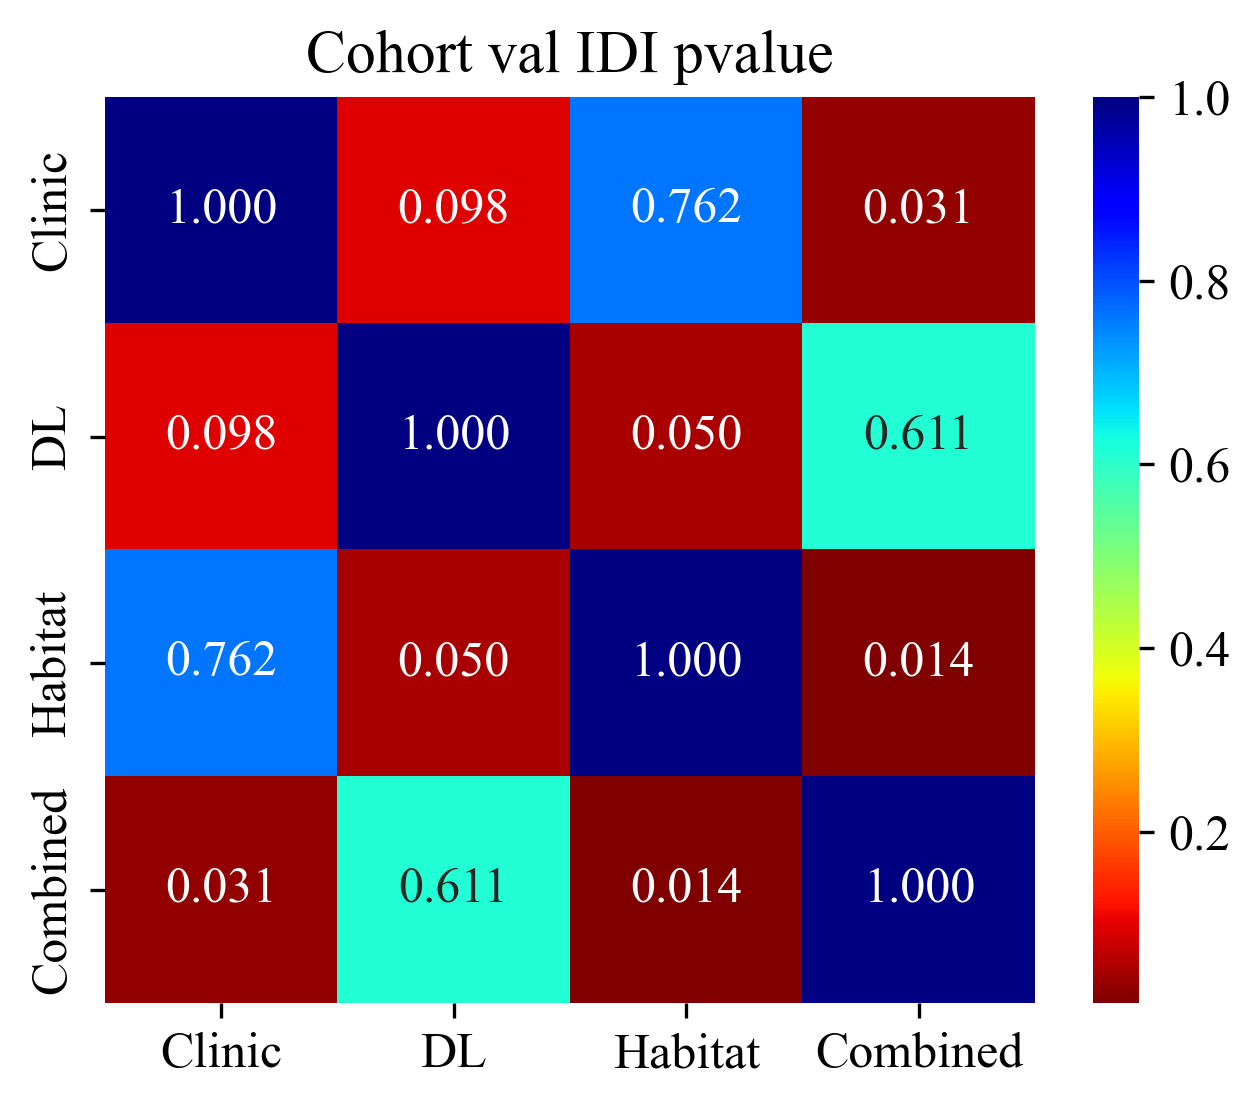

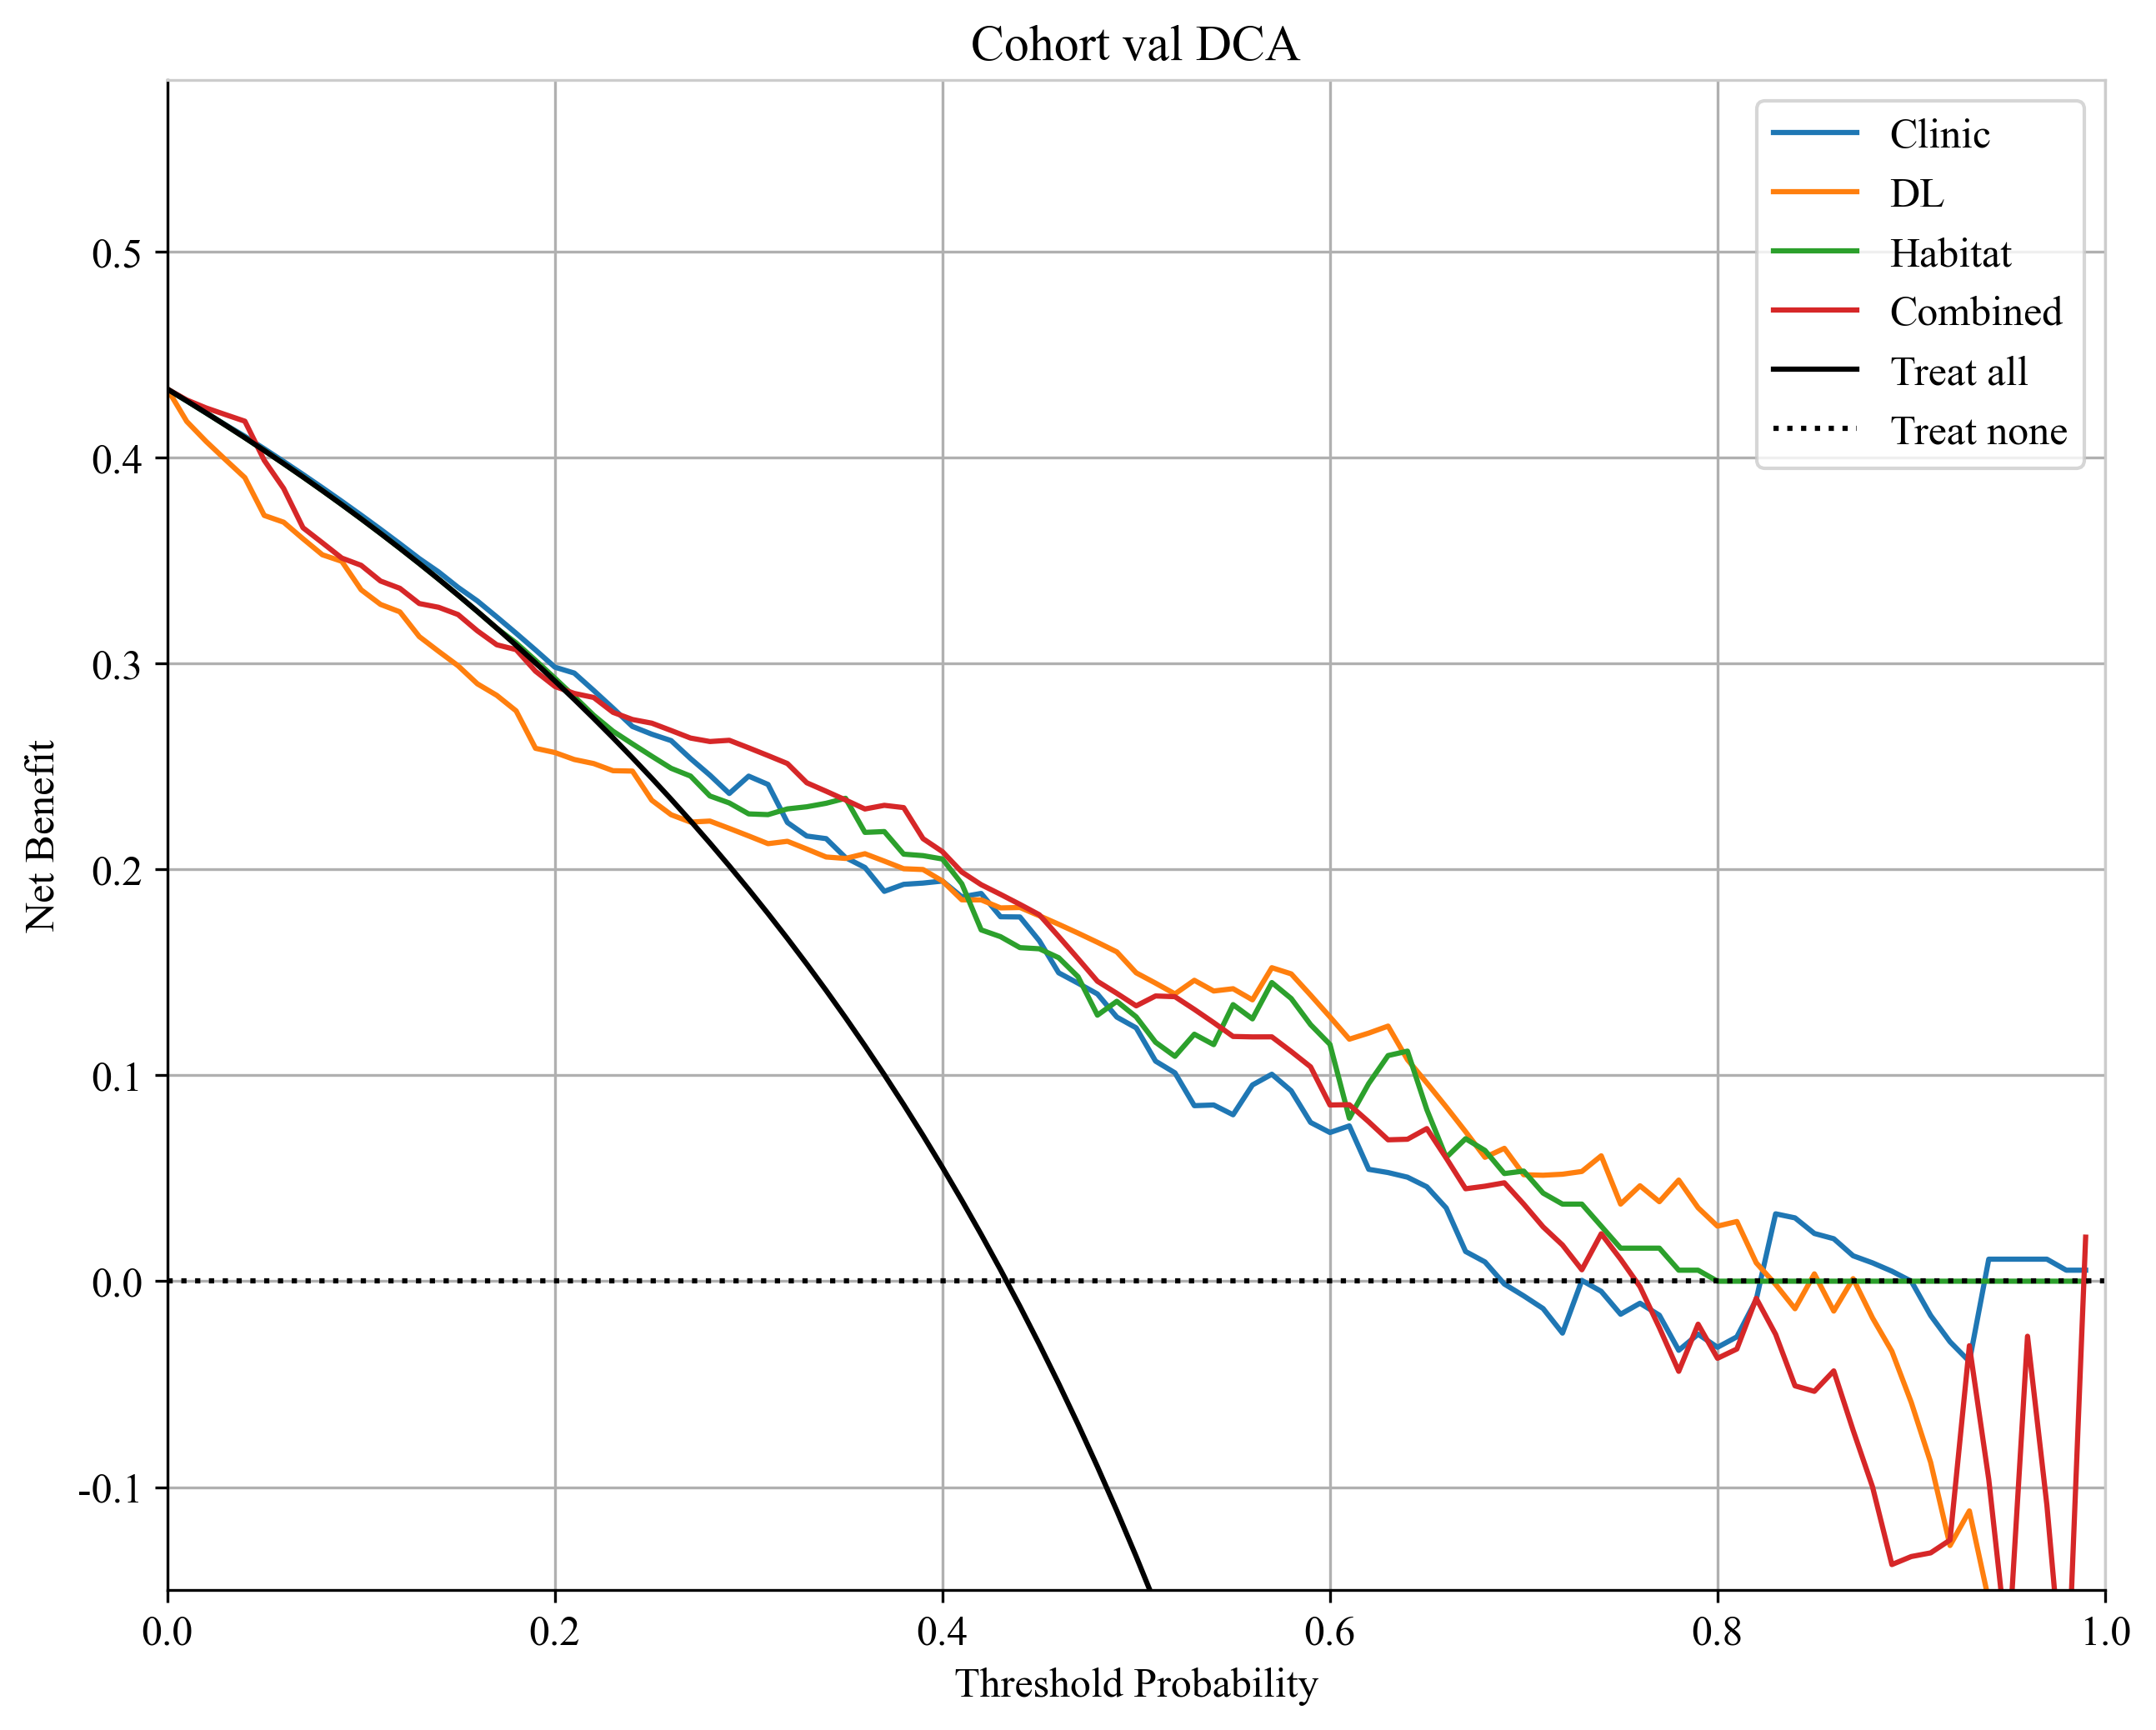

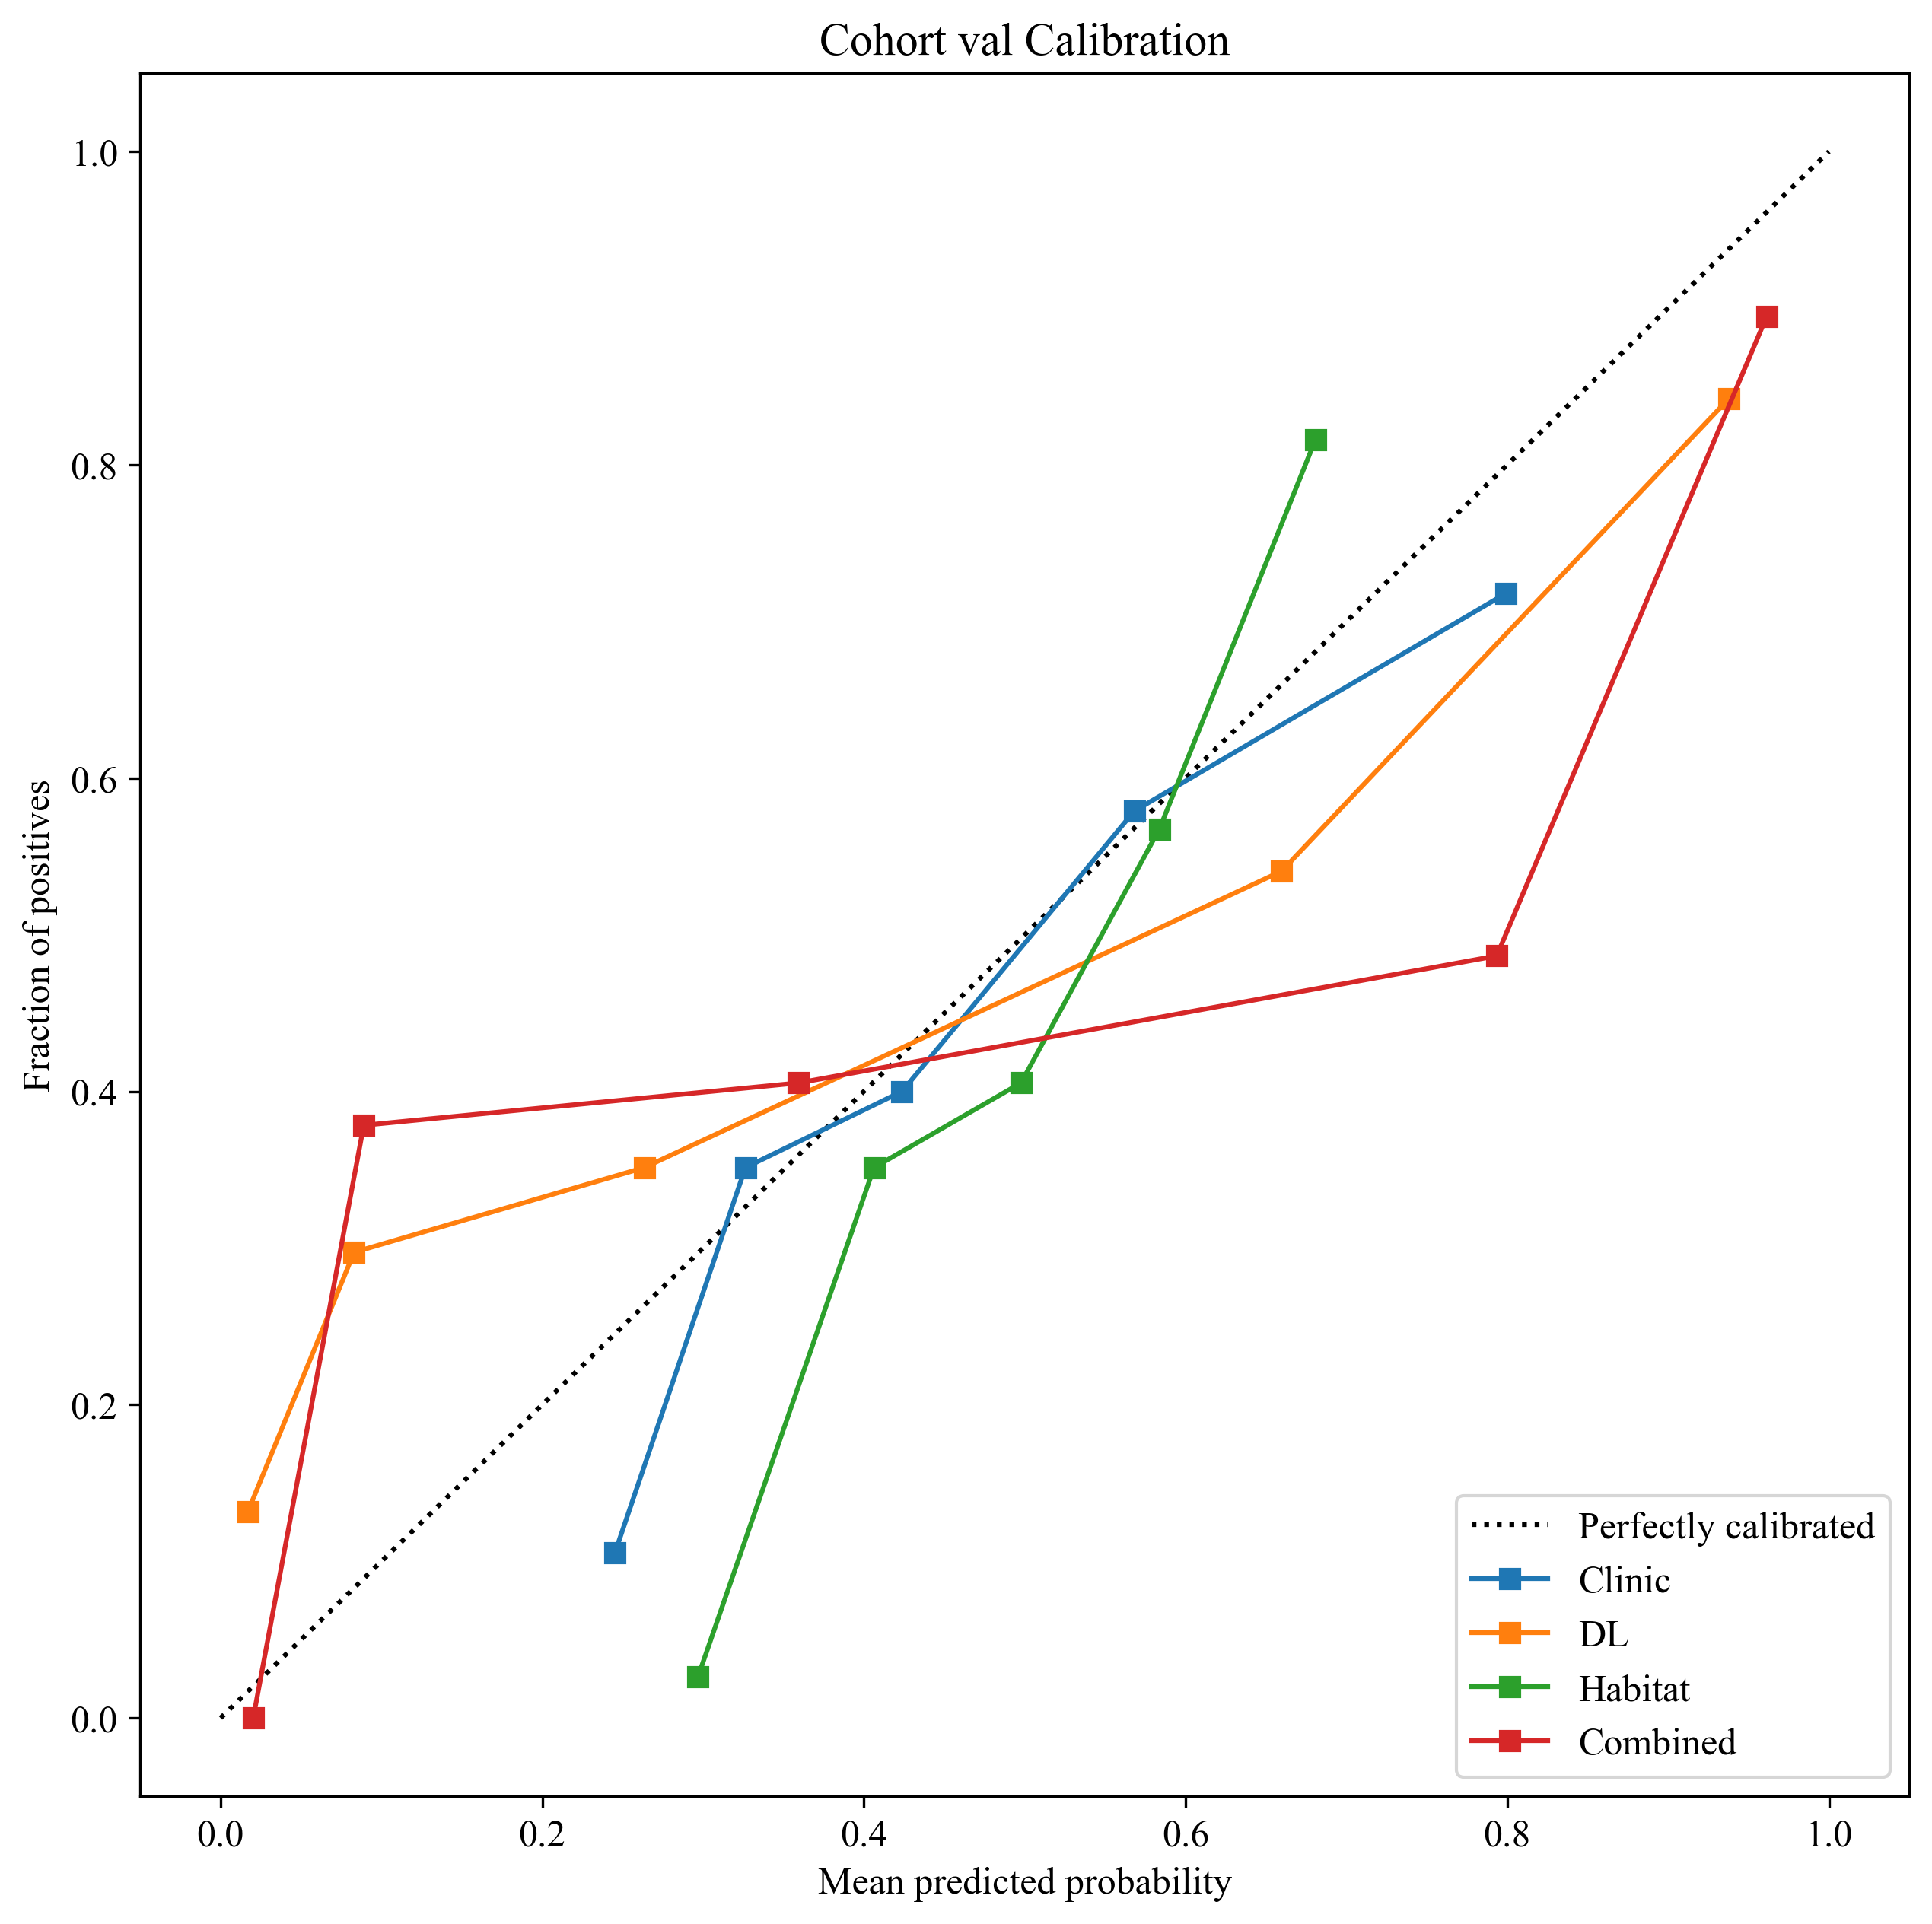

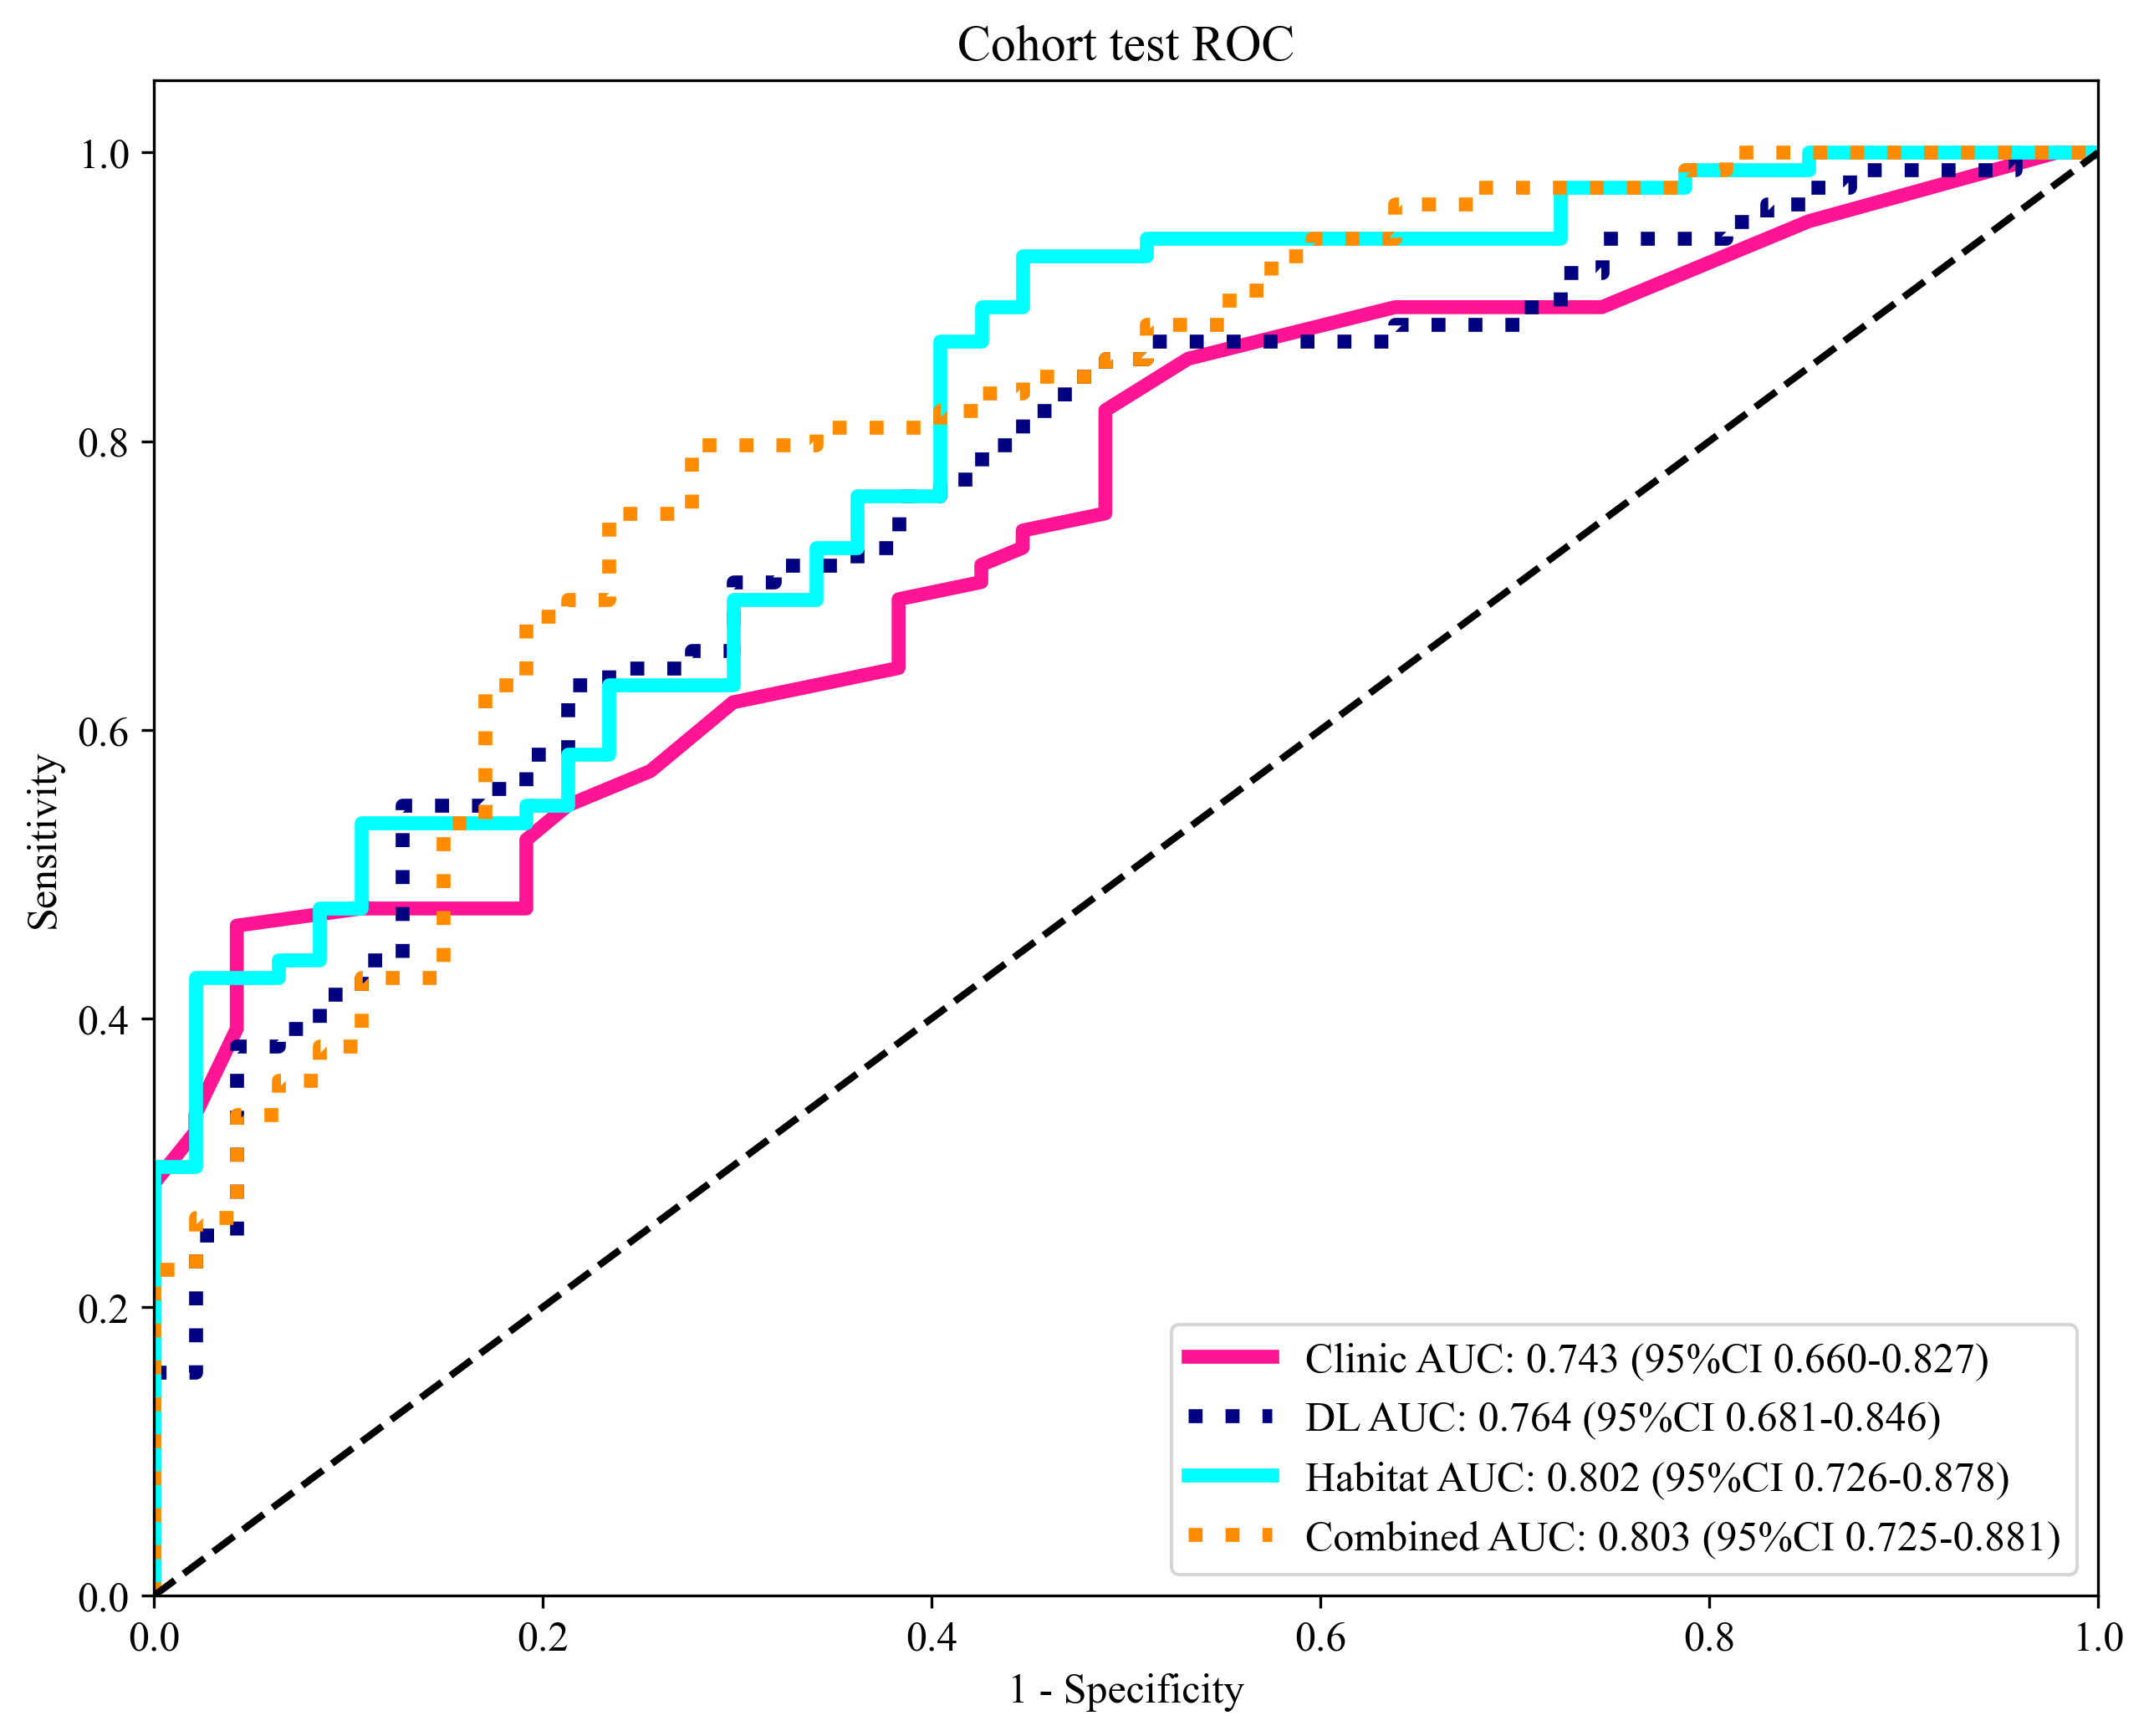

Signature  Accuracy    AUC           95% CI  Sensitivity  Specificity  \
0     Clinic     0.733  0.800  0.7593 - 0.8400        0.620        0.846   
1         DL     0.783  0.866  0.8324 - 0.8988        0.769        0.796   
2    Habitat     0.814  0.895  0.8663 - 0.9228        0.792        0.837   
3   Combined     0.880  0.936  0.9151 - 0.9577        0.900        0.860   
4     Clinic     0.706  0.758  0.6902 - 0.8266        0.728        0.689   
5         DL     0.754  0.775  0.7072 - 0.8428        0.630        0.849   
6    Habitat     0.738  0.803  0.7422 - 0.8641        0.630        0.821   
7   Combined     0.733  0.816  0.7569 - 0.8755        0.765        0.708   
8     Clinic     0.641  0.743  0.6601 - 0.8267        0.464        0.957   
9         DL     0.664  0.764  0.6813 - 0.8461        0.548        0.872   
10   Habitat     0.794  0.802  0.7265 - 0.8784        0.929        0.553   
11  Combined     0.771  0.803  0.7251 - 0.8813        0.798        0.723   

      PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0   0.801  0.690      0.801   0.620  0.699      0.547  train  
1   0.791  0.775      0.791   0.769  0.780      0.505  train  
2   0.829  0.801      0.829   0.792  0.810      0.509  train  
3   0.865  0.896      0.865   0.900  0.882      0.412  train  
4   0.641  0.768      0.641   0.728  0.682      0.445    val  
5   0.761  0.750      0.761   0.630  0.689      0.577    val  
6   0.729  0.744      0.729   0.630  0.675      0.558    val  
7   0.667  0.798      0.667   0.765  0.713      0.382    val  
8   0.951  0.500      0.951   0.464  0.624      0.661   test  
9   0.885  0.519      0.885   0.548  0.676      0.857   test  
10  0.788  0.812      0.788   0.929  0.852      0.455   test  
11  0.837  0.667      0.837   0.798  0.817      0.531   test

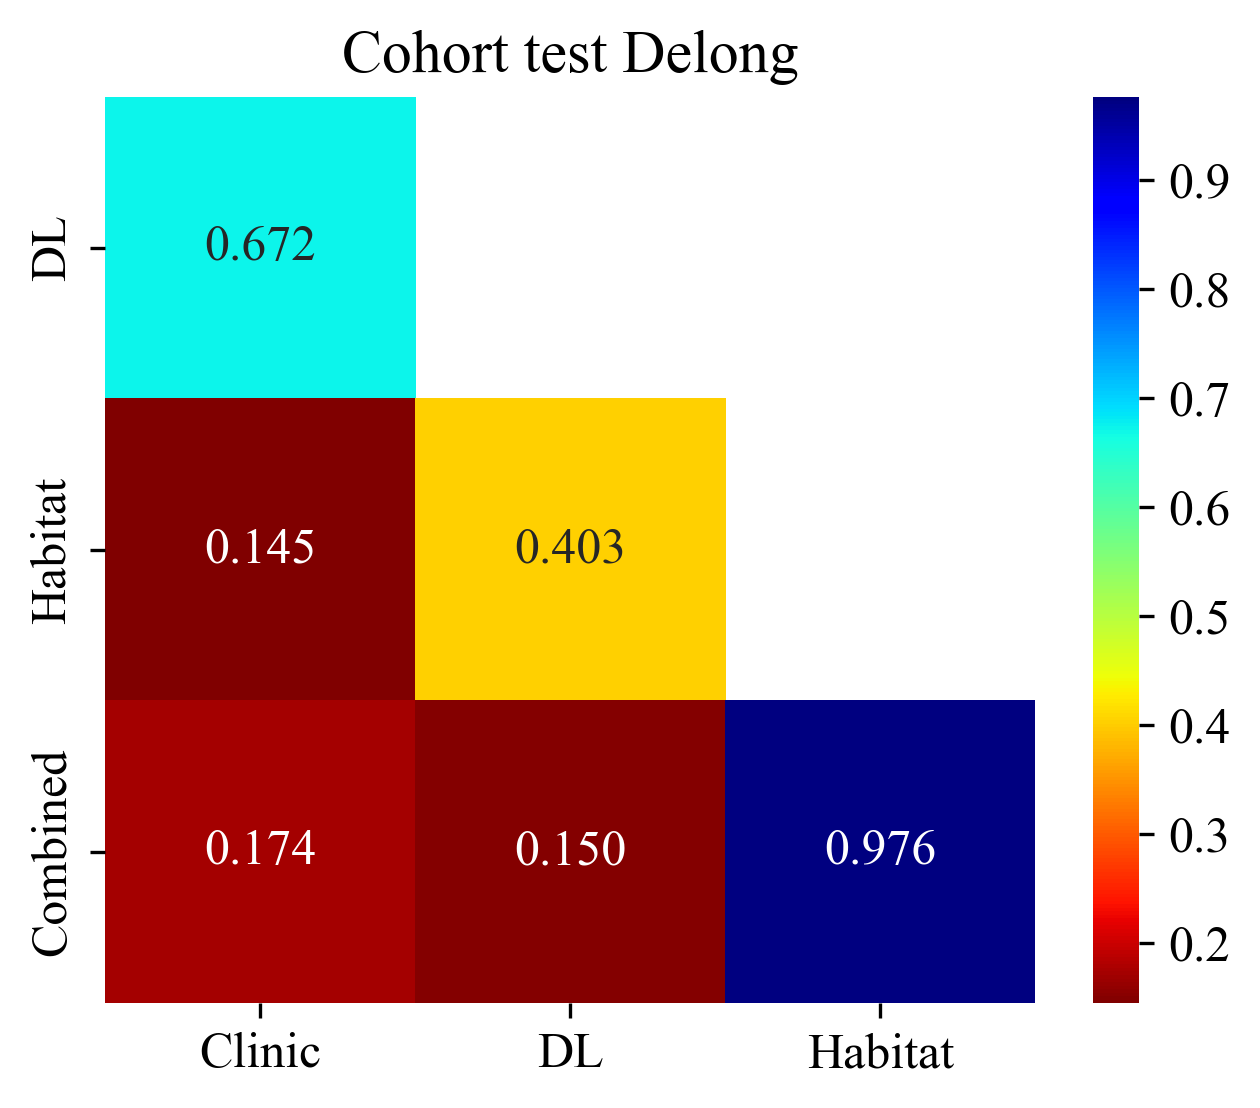

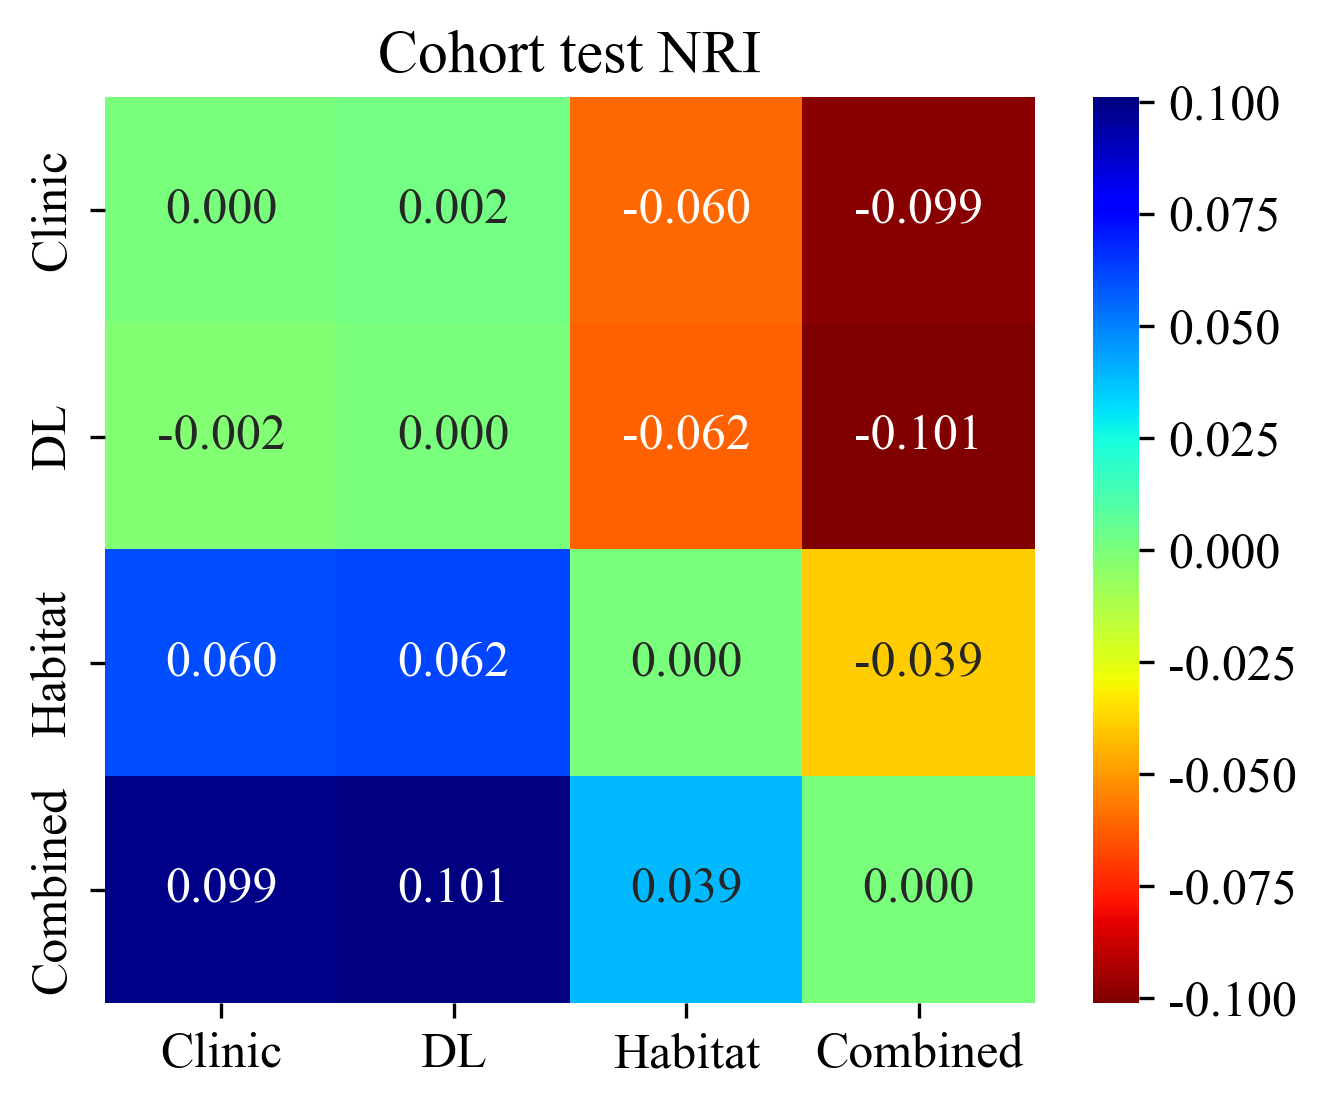

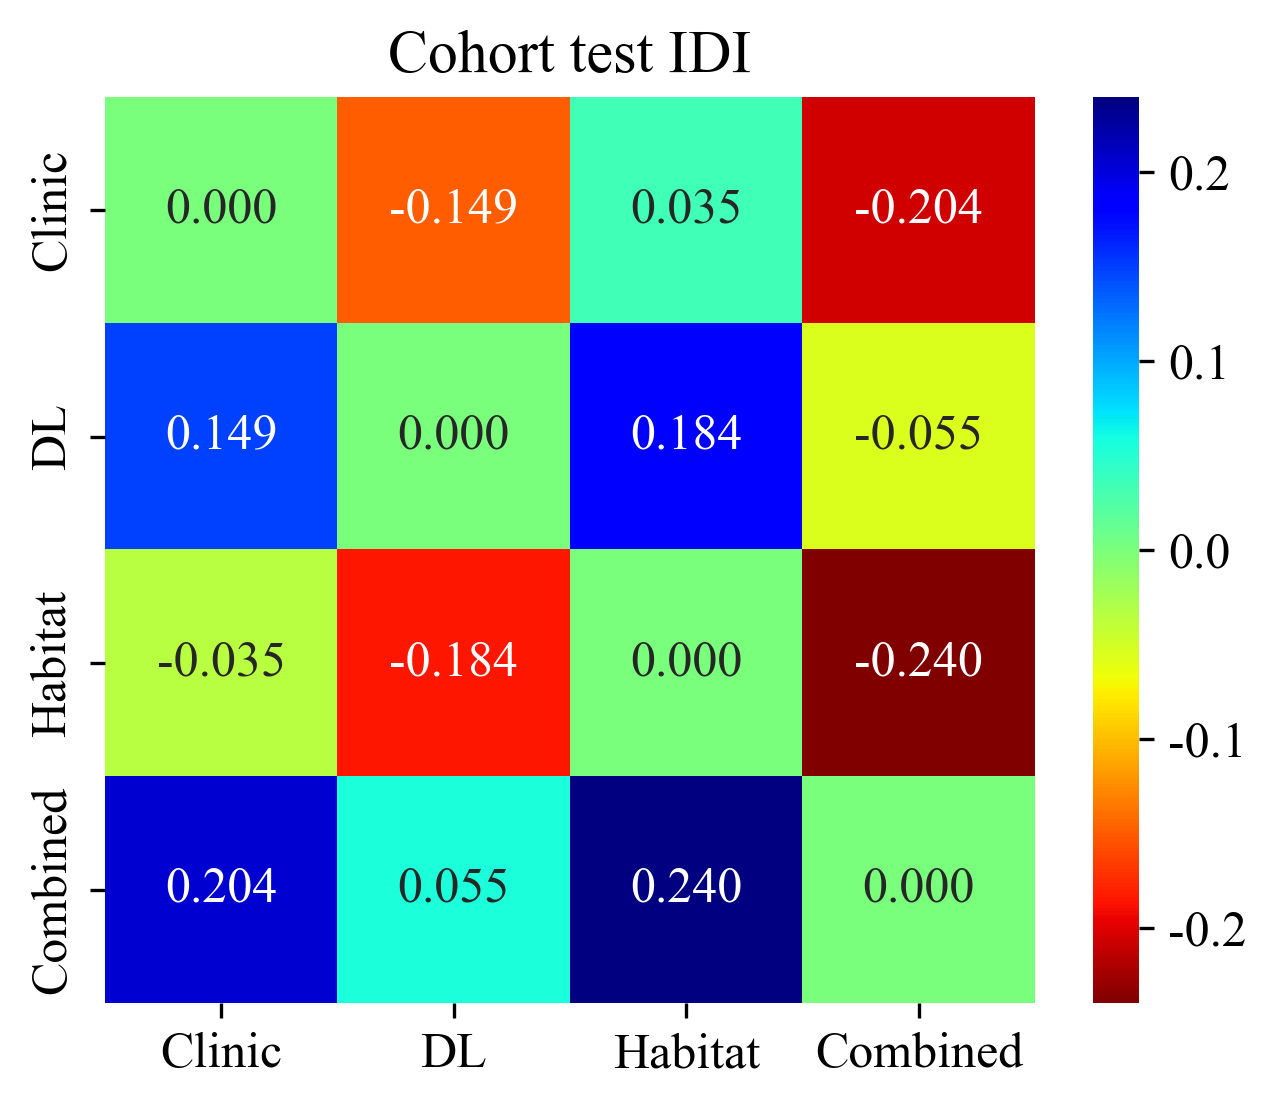

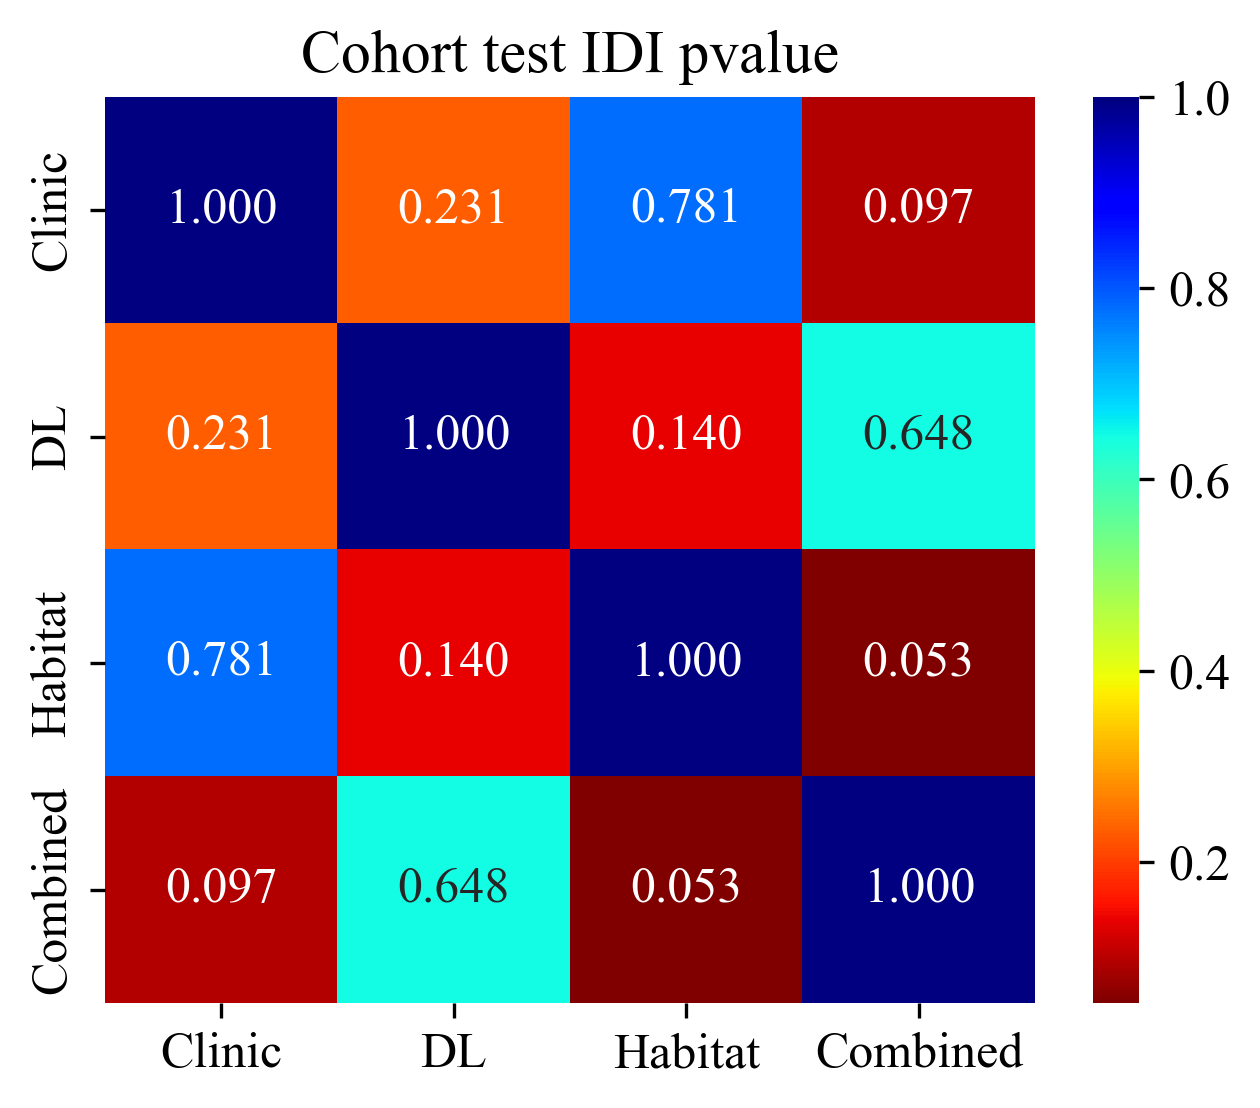

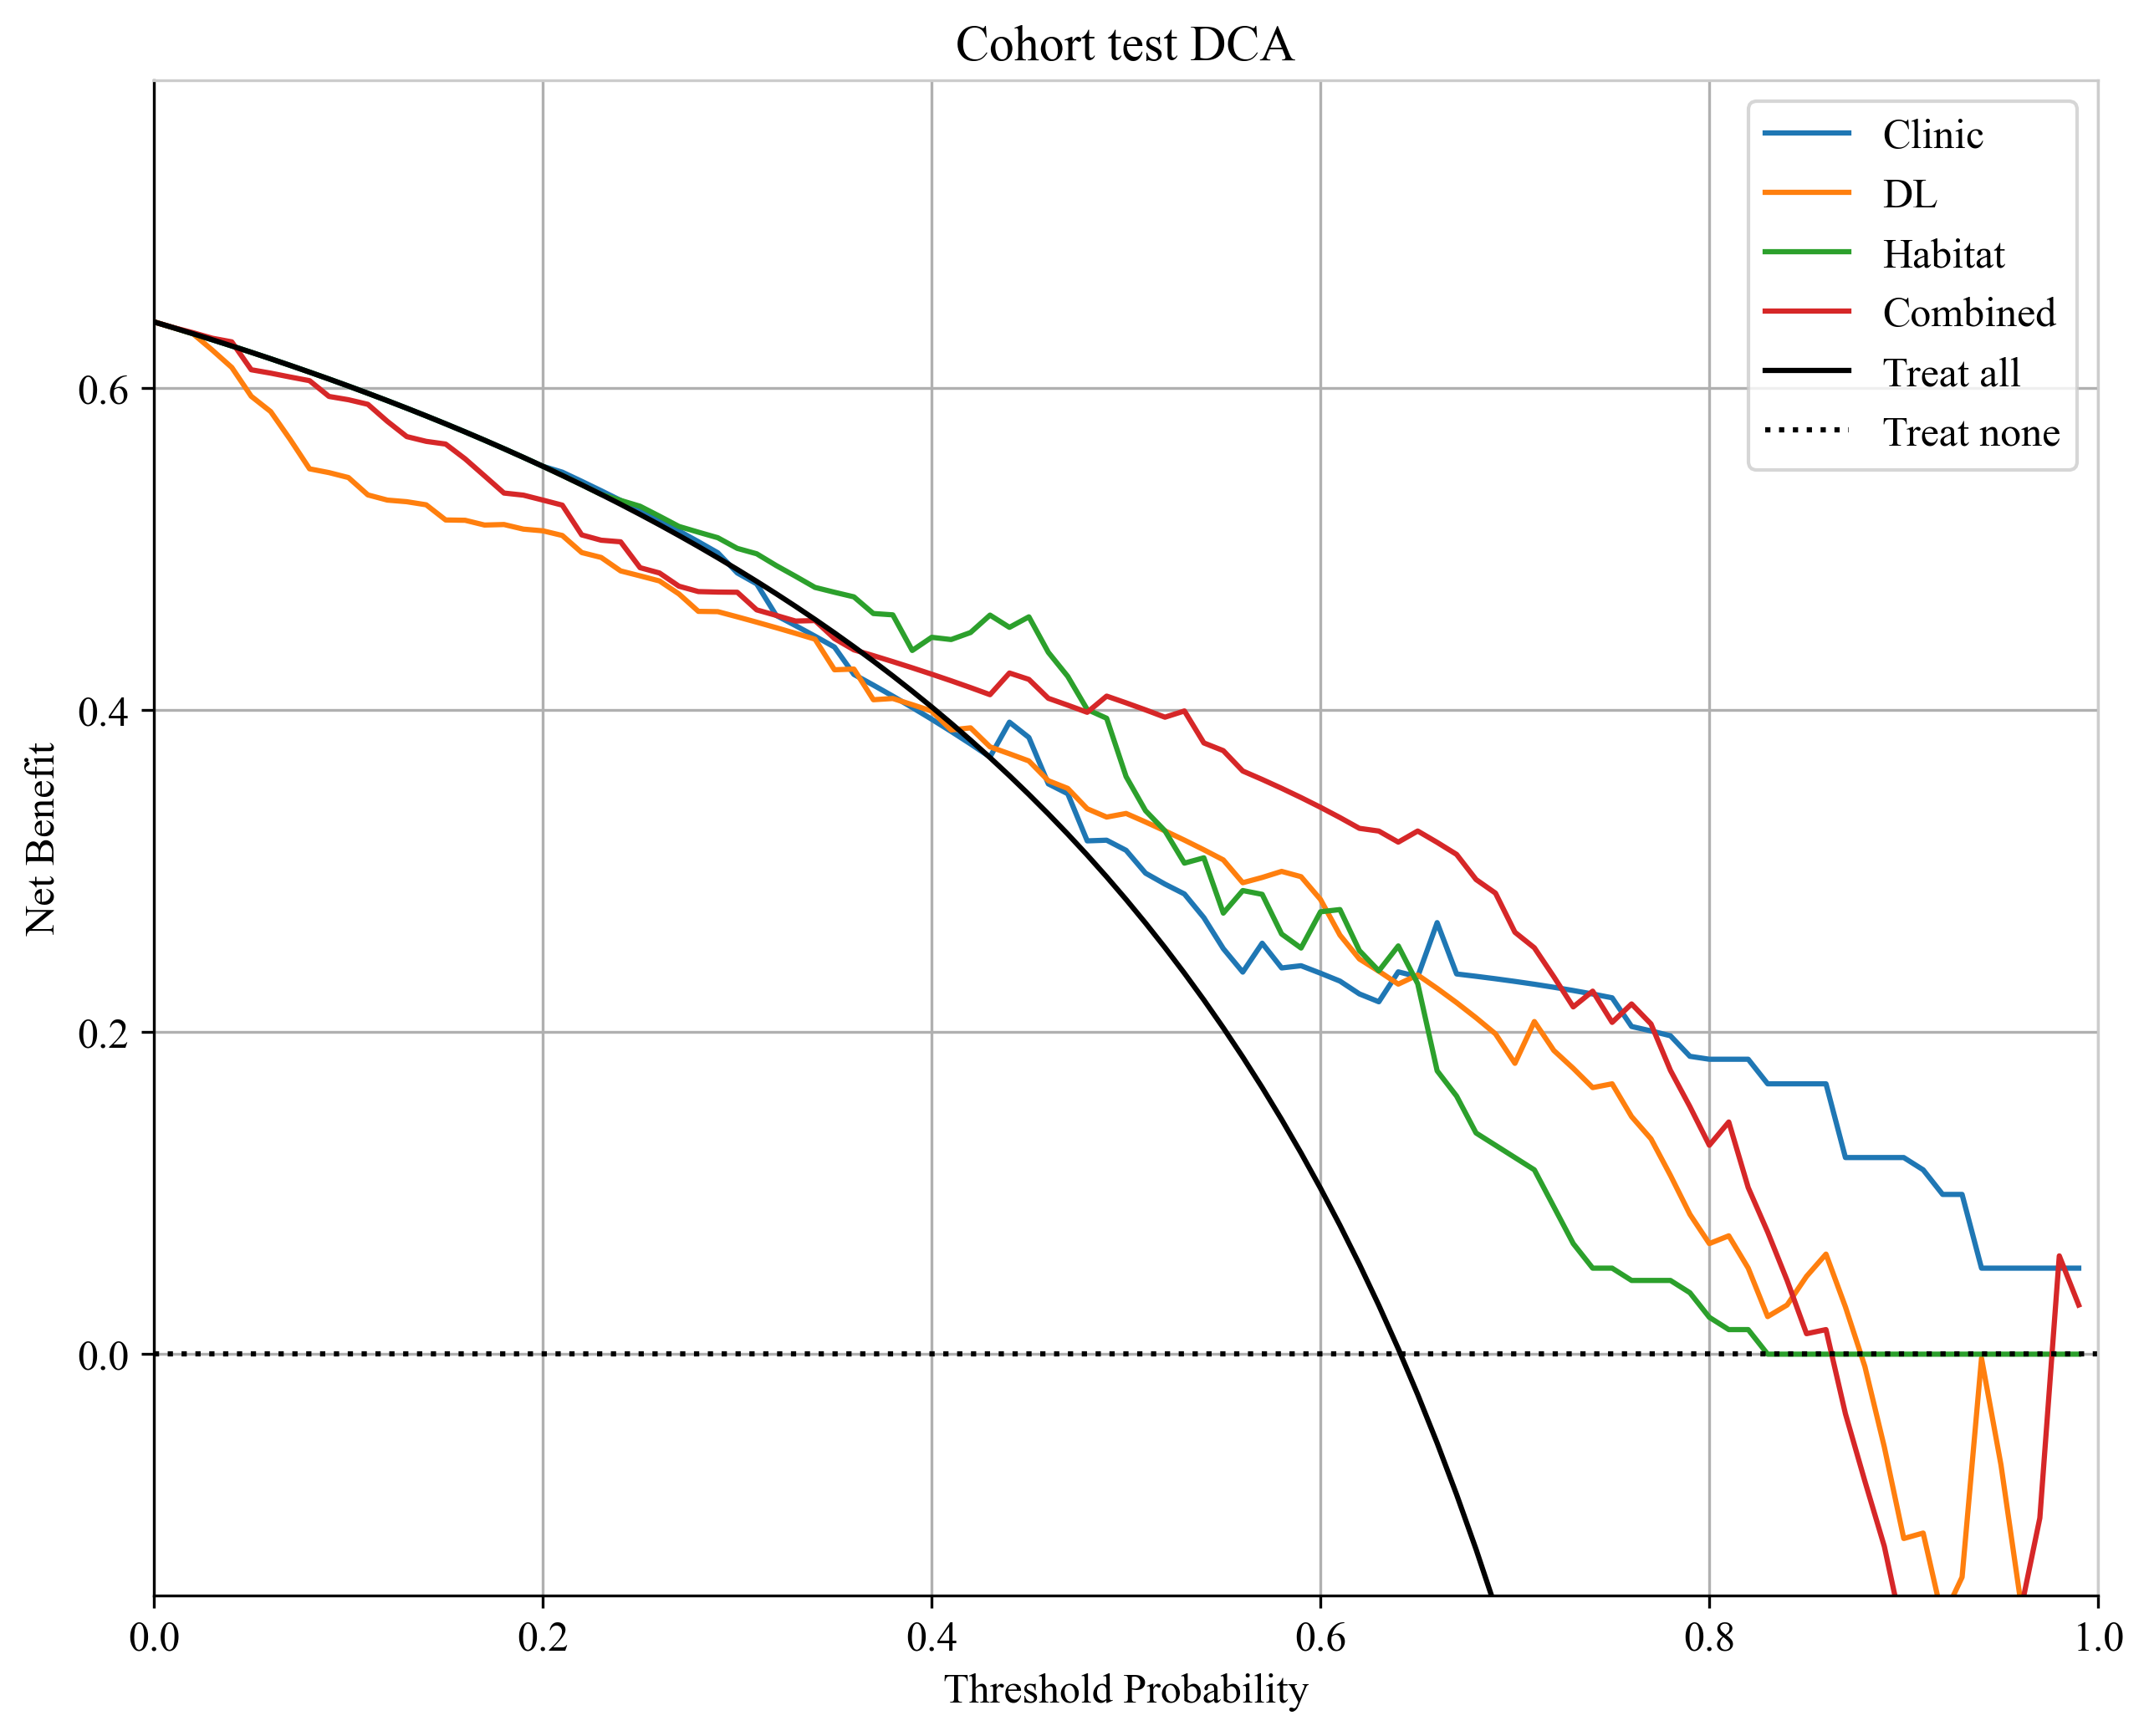

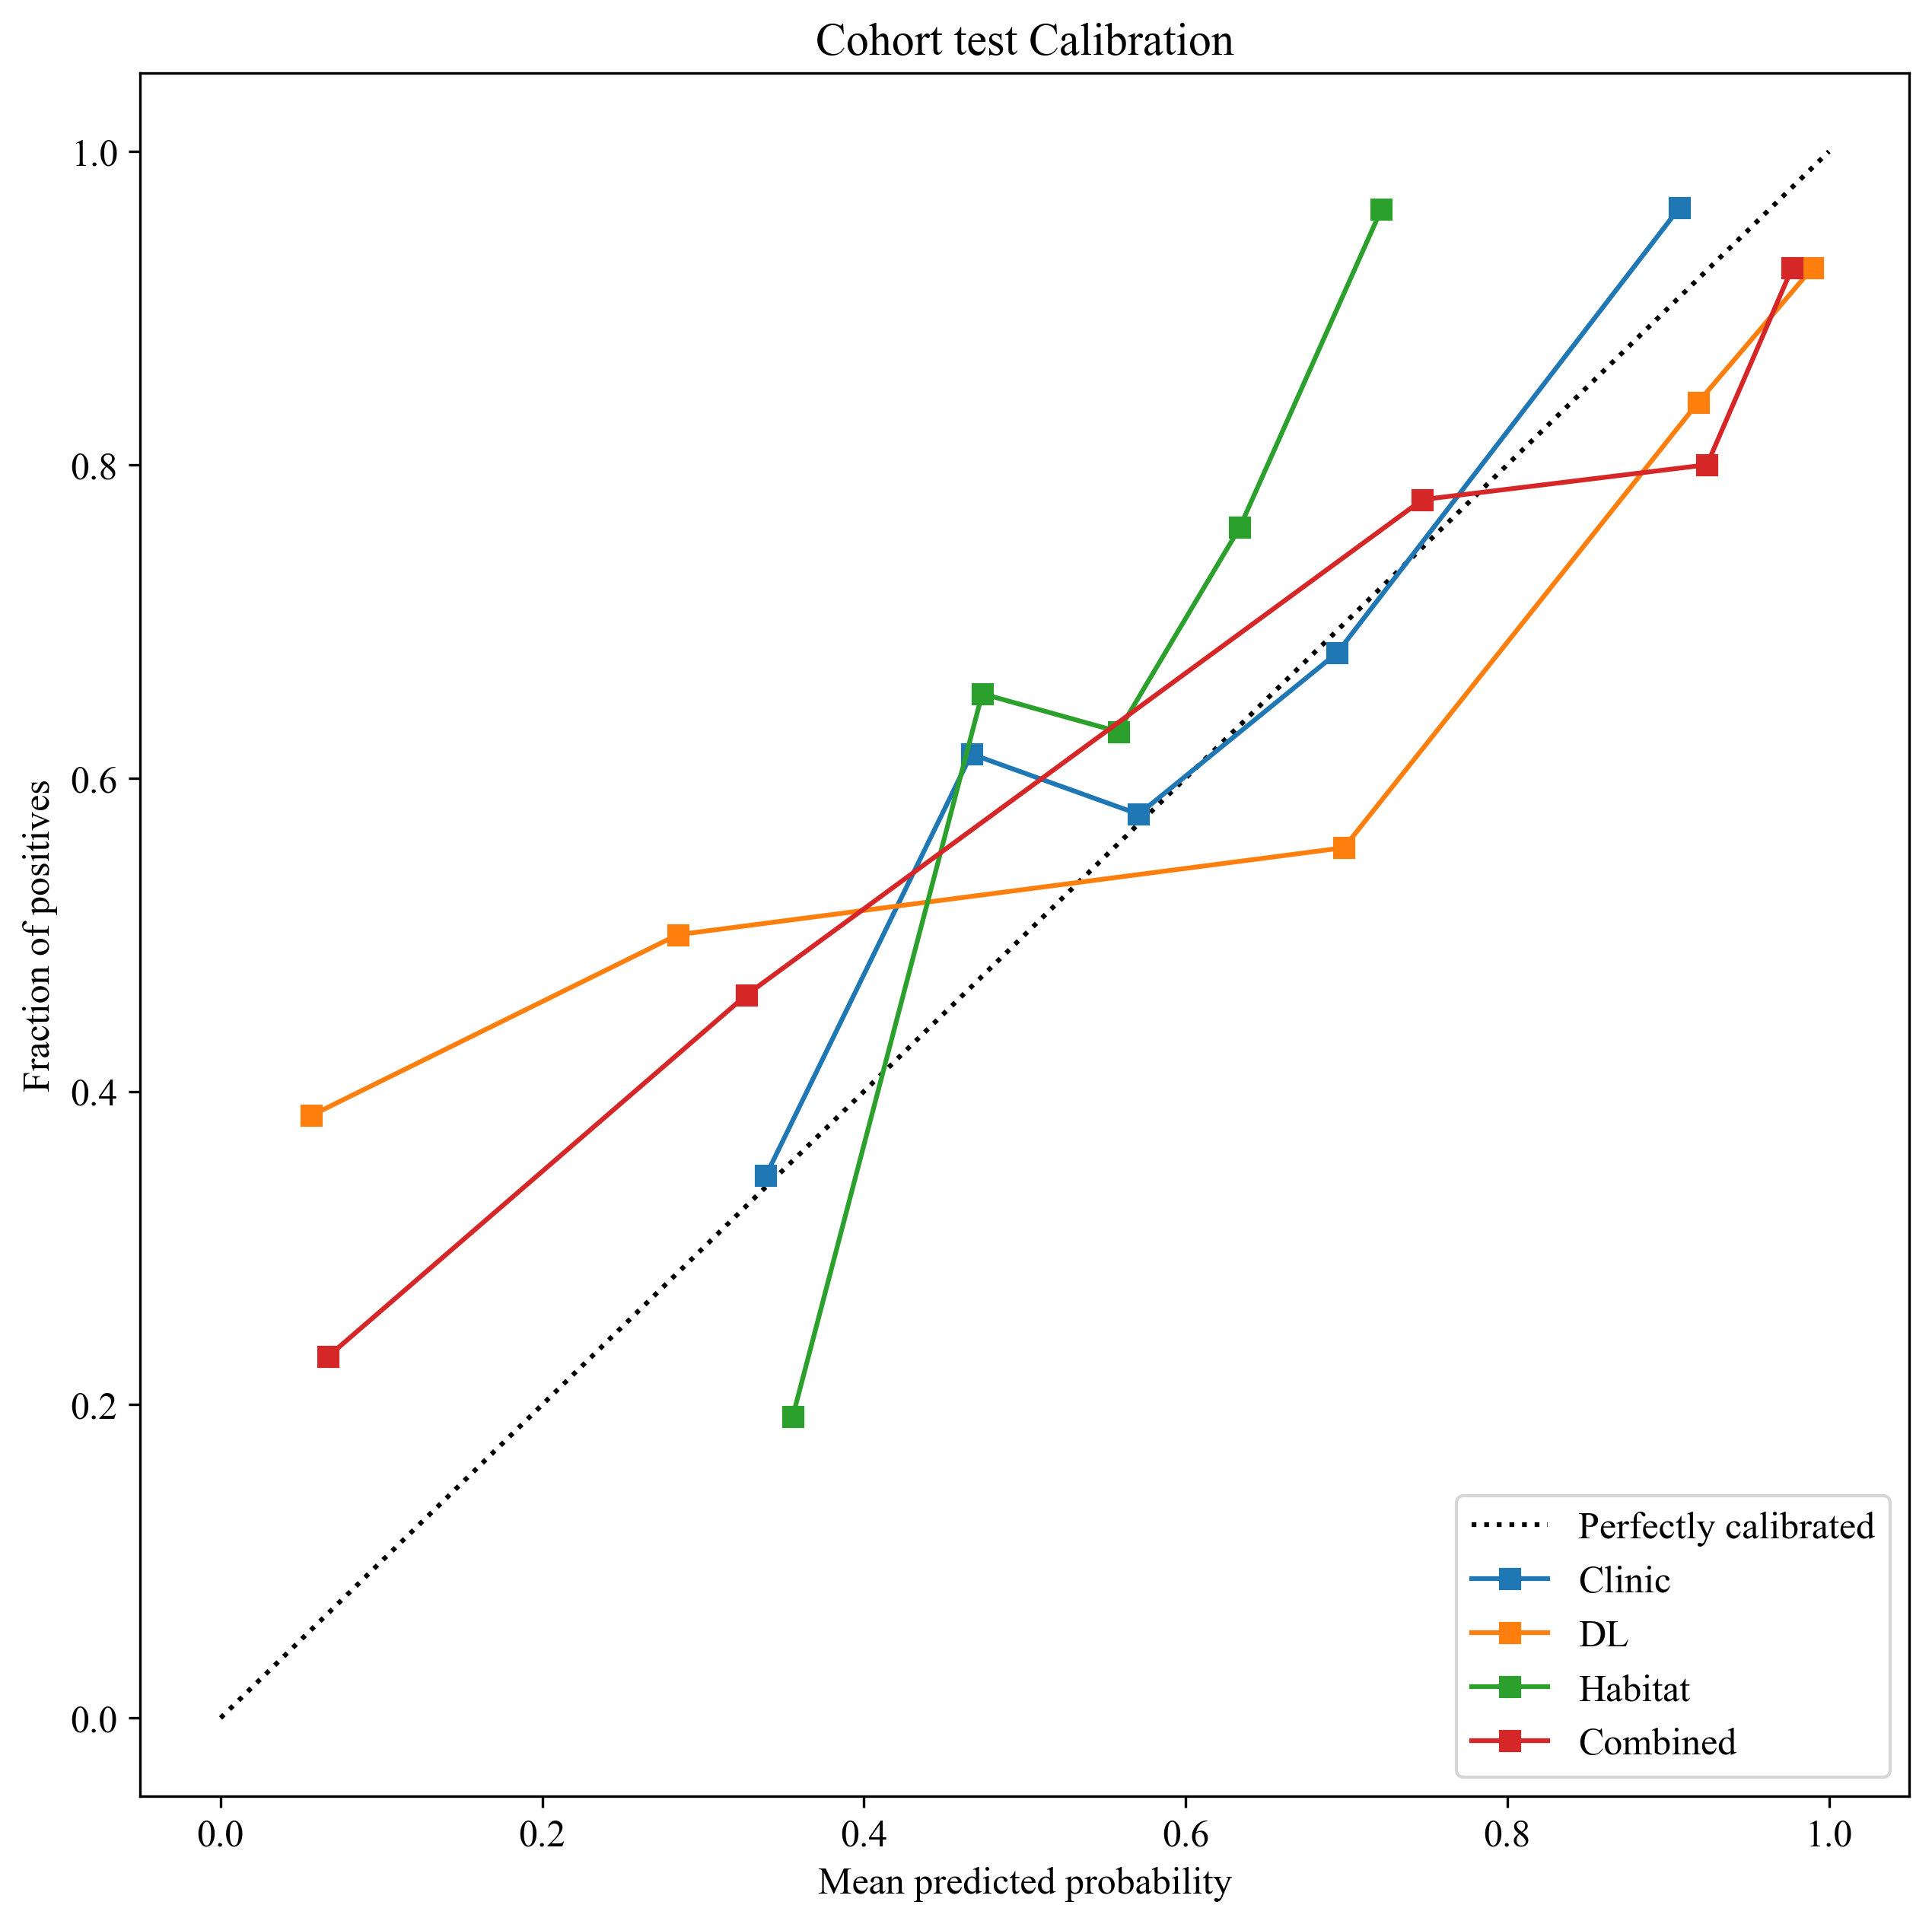

Clinic     DL    Habitat   Combined Cohort
0   0.109  0.210  1.528e-05  1.687e-02  train
1   0.105  0.252  3.703e-03  7.629e-04    val
2   0.112  0.597  3.491e-03  4.443e-01   test

In [2]:
import pandas as pd
from onekey_algo.custom.components.comp1 import normalize_df, merge_results
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from onekey_algo.custom.components import metrics
from onekey_algo.custom.components.delong import delong_roc_test
from onekey_algo.custom.components.comp1 import draw_matrix
from onekey_algo.custom.components.metrics import NRI, IDI
from onekey_algo.custom.components.comp1 import plot_DCA
from onekey_algo.custom.components.comp1 import draw_calibration
from onekey_algo.custom.components import stats
from onekey_algo.custom.components.metrics import analysis_pred_binary
from onekey_algo.custom.components import nomogram

hosmer = []
youden = {}
metric = []
fig_size = (5, 4)
for subset in [s for s in get_param_in_cwd('subsets', ['val', 'test'])]:
    ALL_results = None
    for mn in  model_names[:-1]:
        r = pd.read_csv(f"./results/{mn}_{sel_m[mn]}_{subset if subset == 'train' else 'test'}.csv")
        r['ID'] = r['ID'].map(lambda x: os.path.basename(x).replace('.png', '.gz'))
        r.columns = ['ID', '-0', mn]
        if ALL_results is None:
            ALL_results = r
        else:
            ALL_results = pd.merge(ALL_results, r, on='ID', how='inner')
    Clinic = pd.read_csv('data/clinic_sel.csv')
    cnames = [c for c in Clinic.columns if c not in ['ID', 'group', 'label']]
    ALL_results =merge_results(ALL_results, Clinic[['ID'] + cnames], label_data[label_data[group_info] == subset], label_col='ID')
#     ALL_results = normalize_df(ALL_results, not_norm=['ID', 'label'])
    ALL_results = ALL_results.dropna(axis=1)
#     display(ALL_results)
    
    # 计算Nomogram
    data_x = ALL_results[cnames + get_param_in_cwd('fusion_models')]
#     data_x = ALL_results[list(Clinic.columns[1:]) + [model_names[2]]]
    data_y = ALL_results[task]
    if subset == 'train':
        model = LogisticRegression(random_state=0, penalty='none')
        # model = SVC(probability=True, random_state=0)
        model.fit(data_x, data_y)
    results = model.predict_proba(data_x)
    results = pd.DataFrame(results, index=ALL_results['ID'], columns=[f'{task}-0', f'{task}-1']).reset_index()
    results.to_csv(f'./results/Nomo_{subset}.csv', index=False, header=True)
    
    # 绘制整体的ROC曲线
    pred_column = [f'{task}-0', f'{task}-1']
    Nomo_results = pd.read_csv(f'./results/Nomo_{subset}.csv', header=0)
    Nomo_results.columns = ['ID', 'label-9', model_names[-1]]
    ALL_results = pd.merge(ALL_results, Nomo_results, on='ID', how='inner')
    gt = [np.array(ALL_results[task]) for _ in model_names]
    pred_train = [np.array(ALL_results[d]) for d in model_names]
    okcomp.comp1.draw_roc(gt, pred_train, labels=model_names, title=f'Cohort {subset} ROC', auto_point=False)
    plt.savefig(f'img/{subset}_auc.svg')
    plt.show()
    
    # 汇总所有的Metric
    for mname, y, score in zip(model_names, gt, pred_train):
        # 计算验证集指标
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y, score)
        ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
        youden[mname] = thres
        metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, subset))
    metric_ = pd.DataFrame(metric, index=None, columns=['Signature', 'Accuracy', 'AUC', '95% CI',
                                                       'Sensitivity', 'Specificity', 
                                                       'PPV', 'NPV', 'Precision', 'Recall', 'F1',
                                                       'Threshold', 'Cohort'])

    display(metric_)
    
    # 绘制Delong
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            if i <= j:
                cm[i][j] = np.nan
            else:
                cm[i][j] = delong_roc_test(ALL_results[task], ALL_results[mni], ALL_results[mnj])[0][0]
    cm = pd.DataFrame(cm[1:, :-1], index=model_names[1:], columns=model_names[:-1])
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} Delong')
    plt.savefig(f'img/{subset}_delong.svg', bbox_inches = 'tight')
    plt.show()
    
    # NRI
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j] = NRI(ALL_results[mni] > youden[mni], ALL_results[mnj] > youden[mnj], ALL_results[task])
    cm = pd.DataFrame(cm, index=model_names, columns=model_names)
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} NRI')
    plt.savefig(f'img/NRI_each_cohort_{subset}.svg', bbox_inches = 'tight')
    plt.show()
    
    # IDI
    delong = []
    delong_columns = []
    this_delong = []
    cm = np.zeros((len(model_names), len(model_names)))
    p = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j], p[i][j] = IDI(ALL_results[mni], ALL_results[mnj], ALL_results[task], with_p=True)

    for d, n in zip([cm, p], ['IDI', 'IDI pvalue']):
        plt.figure(figsize=fig_size)
        d = pd.DataFrame(d, index=model_names, columns=model_names)
        draw_matrix(d, annot=True, cmap='jet_r', cbar=True)
        plt.title(f'Cohort {subset} {n}')
        plt.savefig(f'img/{n}_each_cohort_{subset}.svg', bbox_inches = 'tight')
        plt.show()
        
    # DCA
    plot_DCA([ALL_results[model_name] for model_name in model_names], 
             ALL_results[task], title=f'Cohort {subset} DCA', labels=model_names, y_min=-0.15, remap=False)
    plt.savefig(f'img/{subset}_dca.svg')
    plt.show()
    
    # Calibration
    draw_calibration(pred_scores=pred_train, n_bins=5, remap=False,
                     y_test=gt, model_names=model_names)
    plt.title(f'Cohort {subset} Calibration')
    plt.savefig(f'img/{subset}_cali.svg')
    plt.show()
    
    # HLTest
    hosmer.append([stats.hosmer_lemeshow_test(y_true, y_pred, bins=10, remap=True) 
                  for fn, y_true, y_pred in zip(model_names, gt, pred_train)])
    
    if subset == 'train':
        ALL_results = ALL_results.round(decimals=2)
        n = nomogram.risk_nomogram(ALL_results, result=task, save_name='img/nomogram.png',
                                   columns=list(data_x.columns), width=8000, height=5000, 
                                   x_range='0.05,0.15,0.25,0.35,0.5,0.65,0.75,0.85,0.95')
        display(n)
pd.concat([pd.DataFrame(hosmer, columns=model_names), pd.DataFrame(get_param_in_cwd('subsets'), columns=['Cohort'])], axis=1)

In [3]:
m = pd.DataFrame(metric, index=None, columns=['Signature', 'Accuracy', 'AUC', '95% CI',
                                              'Sensitivity', 'Specificity', 
                                              'PPV', 'NPV', 'Precision', 'Recall', 'F1',
                                              'Threshold', 'Cohort'])
m[['Signature', 'Accuracy', 'AUC', '95% CI', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'Cohort']].to_csv('results/metrics.csv', index=False)
m

Signature  Accuracy    AUC           95% CI  Sensitivity  Specificity  \
0     Clinic     0.733  0.800  0.7593 - 0.8400        0.620        0.846   
1         DL     0.783  0.866  0.8324 - 0.8988        0.769        0.796   
2    Habitat     0.814  0.895  0.8663 - 0.9228        0.792        0.837   
3   Combined     0.880  0.936  0.9151 - 0.9577        0.900        0.860   
4     Clinic     0.706  0.758  0.6902 - 0.8266        0.728        0.689   
5         DL     0.754  0.775  0.7072 - 0.8428        0.630        0.849   
6    Habitat     0.738  0.803  0.7422 - 0.8641        0.630        0.821   
7   Combined     0.733  0.816  0.7569 - 0.8755        0.765        0.708   
8     Clinic     0.641  0.743  0.6601 - 0.8267        0.464        0.957   
9         DL     0.664  0.764  0.6813 - 0.8461        0.548        0.872   
10   Habitat     0.794  0.802  0.7265 - 0.8784        0.929        0.553   
11  Combined     0.771  0.803  0.7251 - 0.8813        0.798        0.723   

      PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0   0.801  0.690      0.801   0.620  0.699      0.547  train  
1   0.791  0.775      0.791   0.769  0.780      0.505  train  
2   0.829  0.801      0.829   0.792  0.810      0.509  train  
3   0.865  0.896      0.865   0.900  0.882      0.412  train  
4   0.641  0.768      0.641   0.728  0.682      0.445    val  
5   0.761  0.750      0.761   0.630  0.689      0.577    val  
6   0.729  0.744      0.729   0.630  0.675      0.558    val  
7   0.667  0.798      0.667   0.765  0.713      0.382    val  
8   0.951  0.500      0.951   0.464  0.624      0.661   test  
9   0.885  0.519      0.885   0.548  0.676      0.857   test  
10  0.788  0.812      0.788   0.929  0.852      0.455   test  
11  0.837  0.667      0.837   0.798  0.817      0.531   test